<a href="https://colab.research.google.com/github/huricane85/FPL-API-Fixture-modeler/blob/main/FPL%20Model%20%2008.03.2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/doughagey/UnderstatScraper

Cloning into 'UnderstatScraper'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 34 (delta 11), reused 25 (delta 2), pack-reused 0
Receiving objects: 100% (34/34), 268.30 KiB | 3.27 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mar 1 17:50:36 2020
@author: doug hagey
"""

import pandas as pd
import requests

def scrape_understat(payload):
    #Build request using url, headers (mimicking what Firefox does normally)
    #Works best with verify=True as you won't get the ssl errors. Payload is
    #taylored for each request
    url = 'https://understat.com/main/getPlayersStats/'
    headers = {'content-type':'application/json; charset=utf-8',
    'Host': 'understat.com',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73.0) Gecko/20100101 Firefox/73.0',
    'Accept': 'application/json, text/javascript, */*; q=0.01',
    'Accept-Encoding': 'gzip, deflate, br',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'X-Requested-With': 'XMLHttpRequest',
    'Content-Length': '310',
    'Origin': 'https: // understat.com',
    'Connection': 'keep - alive',
    'Referer': 'https: // understat.com / league / EPL'
    }
    response = requests.post(url, data=payload, headers = headers, verify=True)
    response_json = response.json()
    inner_wrapper = response_json['response']
    json_player_data = inner_wrapper['players']
    return json_player_data

def clean_df(player_df, weeks):
    # Get rid of the columns that we don't care about
    #player_df.drop(['yellow_cards','red_cards', 'xGChain','xGBuildup','games','time'], axis=1, inplace=True)
    player_df  = player_df.rename(columns={'goals':'goals_'+weeks,'xG':'xG_'+weeks,'assists':'assists_'+weeks, 'xA':'xA_'+weeks, 'shots':'shots_'+weeks, 'key_passes':
        'key_passes_'+weeks,'npg':'npg_'+weeks,'npxG':'npxG_'+weeks})
    if weeks != '1wks':
        player_df.drop(['position','team_title'], axis=1, inplace=True)
    return(player_df)

#Creprint('Getting data for last 1 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '27'})
one_game_table = pd.DataFrame(json_player_data)
one_game_df = clean_df(one_game_table,'6wks')


print('Getting data for the whole season')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023'})
season_table = pd.DataFrame(json_player_data)
season_df = clean_df(season_table, 'season')

print('Getting data for last 1 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '27'})
one_game_table = pd.DataFrame(json_player_data)
one_game_df = clean_df(one_game_table, '1wks')

print('Merging Tables')
EPL_player_df = pd.merge(one_game_df, season_df, on=['id','player_name'])
EPL_player_df = pd.merge(EPL_player_df, one_game_df, on=['id','player_name'])


print('Writing CSV File')
EPL_player_df.to_csv('Understat_EPL_Player_Data_Combined 2021.csv', encoding='utf-8', index=False)


Getting data for the whole season
Getting data for last 1 matches
Merging Tables
Writing CSV File


In [3]:
EPL_player_df = EPL_player_df.round(2)
EPL_player_df

,id,player_name,games_x,time_x,goals_1wks_x,xG_1wks_x,assists_1wks_x,xA_1wks_x,shots_1wks_x,key_passes_1wks_x,...,shots_1wks_y,key_passes_1wks_y,yellow_cards,red_cards,position_y,team_title_y,npg_1wks_y,npxG_1wks_y,xGChain,xGBuildup
0,8260,Erling Haaland,22,1849,18,22.268411308526993,5,3.889001840725541,91,22,...,91,22,1,0,F S,Manchester City,15,19.223736137151718,22.561486311256886,2.0062904562801123
1,8865,Ollie Watkins,27,2409,16,16.266097329556942,10,5.876053761690855,85,37,...,85,37,4,0,F,Aston Villa,16,16.266097329556942,24.363870412111282,4.546155463904142
2,1250,Mohamed Salah,21,1815,15,14.35135069489479,9,10.167602833360434,67,49,...,67,49,2,0,F S,Liverpool,11,9.784411862492561,21.048484906554222,5.75809583067894
3,1679,Dominic Solanke,26,2333,14,15.619912099093199,3,2.3902590684592724,80,24,...,80,24,2,0,F,Bournemouth,13,14.858743246644735,16.06937814503908,2.257373197004199
4,1776,Jarrod Bowen,26,2340,14,10.528724770992994,3,4.039636945351958,63,18,...,63,18,2,0,F M,West Ham,14,10.528724770992994,13.181600715965033,2.224017422646284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,12412,Morgan Rogers,3,65,0,0.32956793159246445,0,0.22922202944755554,3,2,...,3,2,1,0,S,Aston Villa,0,0.32956793159246445,0.6201528459787369,0.17389893531799316
540,12418,Rodrigo Ribeiro,1,1,0,0,0,0,0,0,...,0,0,0,0,S,Nottingham Forest,0,0,0,0
541,12449,Oliver Arblaster,1,21,0,0,0,0.045631736516952515,0,1,...,0,1,0,0,S,Sheffield United,0,0,0.045631736516952515,0
542,12455,Jayden Danns,2,6,0,0,0,0,0,0,...,0,0,1,0,S,Liverpool,0,0,0,0


In [4]:
one_game_df.to_csv('one_game_df.csv', encoding='utf-8', index=False)
one_game_df['time'] = one_game_df['time'].astype(int)
one_game_df = one_game_df[one_game_df['time'] > 40]
one_game_df['goals_1wks'] = one_game_df['goals_1wks'].astype(int)
one_game_df['xG_1wks'] = one_game_df['xG_1wks'].astype(float)
one_game_df['xgdifference'] = one_game_df.goals_1wks - one_game_df.xG_1wks
one_game_df['assists_1wks'] = one_game_df['assists_1wks'].astype(int)
one_game_df['xA_1wks'] = one_game_df['xA_1wks'].astype(float)
one_game_df['xAdifference'] = one_game_df.assists_1wks - one_game_df.xA_1wks
seasonedit = one_game_df.drop(columns=[ 'yellow_cards','red_cards','time'])
sortXgDifference = seasonedit.sort_values('xgdifference')
sortXgDifference.head(10)

<ipython-input-4-30b8c2331977>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_game_df['goals_1wks'] = one_game_df['goals_1wks'].astype(int)
<ipython-input-4-30b8c2331977>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_game_df['xG_1wks'] = one_game_df['xG_1wks'].astype(float)
<ipython-input-4-30b8c2331977>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,id,player_name,games,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,position,team_title,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference
83,5555,Dominic Calvert-Lewin,23,3,9.384585,1,1.867727,51,15,F S,Everton,3,9.384585198014975,8.339534129947424,0.8283903915435076,-6.384585,-0.867727
21,10048,Nicolas Jackson,23,8,13.352358,3,3.486948,51,18,F M S,Chelsea,8,13.35235800780356,16.884114399552345,2.748817328363657,-5.352358,-0.486948
12,10720,Darwin Núñez,25,10,15.103783,7,4.889786,84,27,F S,Liverpool,10,14.342614174820483,19.279402311891317,3.0453371480107307,-5.103783,2.110214
0,8260,Erling Haaland,22,18,22.268411,5,3.889002,91,22,F S,Manchester City,15,19.223736137151718,22.561486311256886,2.0062904562801123,-4.268411,1.110998
81,1228,Bruno Fernandes,26,3,6.373084,6,8.412570,66,76,M,Manchester United,2,4.850745971314609,15.270424462854862,8.927047699689865,-3.373084,-2.412570
151,9983,Beto,22,2,5.329974,0,1.151498,34,10,F S,Everton,2,4.568805426824838,5.302944099530578,0.8305983953177929,-3.329974,-1.151498
154,10809,Keane Lewis-Potter,20,2,4.839445,1,1.042137,23,9,D F S,Brentford,2,4.8394448310136795,5.198387434706092,0.6803260892629623,-2.839445,-0.042137
105,11356,Enzo Fernández,23,3,5.592522,0,3.113996,40,24,M S,Chelsea,2,4.070183861069381,12.508284986019135,7.549964087083936,-2.592522,-3.113996
218,8066,Arnaut Danjuma Groeneveld,14,1,3.423037,0,0.853851,25,6,F M S,Everton,1,3.4230369105935097,4.255711138248444,0.09537248313426971,-2.423037,-0.853851
99,10760,Brennan Johnson,23,3,5.340537,6,3.906653,32,24,F M S,"Nottingham Forest,Tottenham",3,5.340536504983902,10.571488171815872,2.0388473197817802,-2.340537,2.093347


In [5]:
sortXgDifference.tail(10)

,id,player_name,games,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,position,team_title,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference
36,3635,Bernardo Silva,23,6,3.266416,4,6.134672,28,51,M S,Manchester City,6,3.266415700316429,17.636389395222068,11.142500752583146,2.733584,-2.134672
49,12027,Mohammed Kudus,22,6,3.208931,3,2.104593,39,17,F M S,West Ham,6,3.2089310958981514,7.7690432500094175,3.4987326059490442,2.791069,0.895407
11,8845,Hee-Chan Hwang,22,10,7.204284,3,3.057251,36,15,F M S,Wolverhampton Wanderers,9,6.443115079775453,10.32333976123482,2.3682320127263665,2.795716,-0.057251
45,9948,Michael Olise,11,6,3.116079,3,2.885815,30,21,F M S,Crystal Palace,5,2.3549105767160654,5.276739986613393,2.2123710457235575,2.883921,0.114185
17,11718,Elijah Adebayo,23,9,5.984736,0,0.813662,28,14,F M S,Luton,9,5.984735639765859,7.635232524946332,1.9411640595644712,3.015264,-0.813662
14,6854,Diogo Jota,19,9,5.927468,3,2.599801,36,21,F S,Liverpool,9,5.927467778325081,10.80069451034069,5.218722354620695,3.072532,0.400199
52,5553,Declan Rice,27,5,1.756017,5,3.855673,37,29,M,Arsenal,5,1.7560167973861098,13.754127147607505,12.000513084232807,3.243983,1.144327
19,5221,Leon Bailey,25,8,4.538941,8,7.430842,40,35,M S,Aston Villa,8,4.538940733298659,14.589275769889355,6.401538774371147,3.461059,0.569158
4,1776,Jarrod Bowen,26,14,10.528725,3,4.039637,63,18,F M,West Ham,14,10.528724770992994,13.181600715965033,2.224017422646284,3.471275,-1.039637
5,453,Son Heung-Min,23,13,8.323229,6,8.240406,57,43,F M S,Tottenham,12,7.562060132622719,19.30395220220089,7.007491825148463,4.676771,-2.240406


In [6]:
one_game_df

,id,player_name,games,time,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,yellow_cards,red_cards,position,team_title,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference
0,8260,Erling Haaland,22,1849,18,22.268411,5,3.889002,91,22,1,0,F S,Manchester City,15,19.223736137151718,22.561486311256886,2.0062904562801123,-4.268411,1.110998
1,8865,Ollie Watkins,27,2409,16,16.266097,10,5.876054,85,37,4,0,F,Aston Villa,16,16.266097329556942,24.363870412111282,4.546155463904142,-0.266097,4.123946
2,1250,Mohamed Salah,21,1815,15,14.351351,9,10.167603,67,49,2,0,F S,Liverpool,11,9.784411862492561,21.048484906554222,5.75809583067894,0.648649,-1.167603
3,1679,Dominic Solanke,26,2333,14,15.619912,3,2.390259,80,24,2,0,F,Bournemouth,13,14.858743246644735,16.06937814503908,2.257373197004199,-1.619912,0.609741
4,1776,Jarrod Bowen,26,2340,14,10.528725,3,4.039637,63,18,2,0,F M,West Ham,14,10.528724770992994,13.181600715965033,2.224017422646284,3.471275,-1.039637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,12291,Rhys Norrington-Davies,5,107,0,0.000000,0,0.026198,0,1,1,0,D S,Sheffield United,0,0,0.08285419456660748,0.05665656179189682,0.000000,-0.026198
536,12340,Omari Forson,3,61,0,0.048801,1,0.127828,1,2,0,0,M S,Manchester United,0,0.04880104586482048,0.06839122623205185,0.03421920910477638,-0.048801,0.872172
537,12408,Daniel Muñoz,5,450,0,0.210032,0,0.315557,2,6,2,0,D,Crystal Palace,0,0.21003219485282898,0.5058322548866272,0.09529111161828041,-0.210032,-0.315557
538,12409,Adam Wharton,5,385,0,0.078166,0,0.556227,2,7,1,0,M S,Crystal Palace,0,0.07816571369767189,0.688779104501009,0.5098360702395439,-0.078166,-0.556227


In [7]:
onegamedftidy = one_game_df.drop(columns=[
 'time',
 'goals_1wks',
 'assists_1wks',
 'shots_1wks',
 'key_passes_1wks',
 'yellow_cards',
 'red_cards',
 'npg_1wks',
 'npxG_1wks',
 'xGChain',
 'xGBuildup',
 'xgdifference',
 'xAdifference'])
onegamedftidy

,id,player_name,games,xG_1wks,xA_1wks,position,team_title
0,8260,Erling Haaland,22,22.268411,3.889002,F S,Manchester City
1,8865,Ollie Watkins,27,16.266097,5.876054,F,Aston Villa
2,1250,Mohamed Salah,21,14.351351,10.167603,F S,Liverpool
3,1679,Dominic Solanke,26,15.619912,2.390259,F,Bournemouth
4,1776,Jarrod Bowen,26,10.528725,4.039637,F M,West Ham
...,...,...,...,...,...,...,...
535,12291,Rhys Norrington-Davies,5,0.000000,0.026198,D S,Sheffield United
536,12340,Omari Forson,3,0.048801,0.127828,M S,Manchester United
537,12408,Daniel Muñoz,5,0.210032,0.315557,D,Crystal Palace
538,12409,Adam Wharton,5,0.078166,0.556227,M S,Crystal Palace


In [8]:
!git clone https://github.com/pratos/fpl-mappers
!git clone https://github.com/ChrisMusson/FPL-ID-Map


Cloning into 'fpl-mappers'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 94 (delta 32), reused 89 (delta 30), pack-reused 0
Receiving objects: 100% (94/94), 217.69 KiB | 2.75 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Cloning into 'FPL-ID-Map'...
remote: Enumerating objects: 301, done.
remote: Counting objects: 100% (301/301), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 301 (delta 216), reused 233 (delta 148), pack-reused 0
Receiving objects: 100% (301/301), 368.19 KiB | 4.98 MiB/s, done.
Resolving deltas: 100% (216/216), done.


In [9]:
data1 = pd.read_csv('/content/FPL-ID-Map/Understat.csv', on_bad_lines='skip')
data2 = pd.read_csv('/content/FPL-ID-Map/FPL/22-23.csv', on_bad_lines='skip')
understatwithfplid1 = pd.merge(data2,
                     data1,
                     on ='code',
                     how ='left')
understatid = understatwithfplid1.drop(columns=[
'code',
 'first_name_x',
 'second_name_x',
 'web_name_x',
 'first_name_y',
 'second_name_y',
 'web_name_y',])
one_game_df.rename(columns={'id': 'understat'}, inplace=True)
one_game_df

,understat,player_name,games,time,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,yellow_cards,red_cards,position,team_title,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference
0,8260,Erling Haaland,22,1849,18,22.268411,5,3.889002,91,22,1,0,F S,Manchester City,15,19.223736137151718,22.561486311256886,2.0062904562801123,-4.268411,1.110998
1,8865,Ollie Watkins,27,2409,16,16.266097,10,5.876054,85,37,4,0,F,Aston Villa,16,16.266097329556942,24.363870412111282,4.546155463904142,-0.266097,4.123946
2,1250,Mohamed Salah,21,1815,15,14.351351,9,10.167603,67,49,2,0,F S,Liverpool,11,9.784411862492561,21.048484906554222,5.75809583067894,0.648649,-1.167603
3,1679,Dominic Solanke,26,2333,14,15.619912,3,2.390259,80,24,2,0,F,Bournemouth,13,14.858743246644735,16.06937814503908,2.257373197004199,-1.619912,0.609741
4,1776,Jarrod Bowen,26,2340,14,10.528725,3,4.039637,63,18,2,0,F M,West Ham,14,10.528724770992994,13.181600715965033,2.224017422646284,3.471275,-1.039637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,12291,Rhys Norrington-Davies,5,107,0,0.000000,0,0.026198,0,1,1,0,D S,Sheffield United,0,0,0.08285419456660748,0.05665656179189682,0.000000,-0.026198
536,12340,Omari Forson,3,61,0,0.048801,1,0.127828,1,2,0,0,M S,Manchester United,0,0.04880104586482048,0.06839122623205185,0.03421920910477638,-0.048801,0.872172
537,12408,Daniel Muñoz,5,450,0,0.210032,0,0.315557,2,6,2,0,D,Crystal Palace,0,0.21003219485282898,0.5058322548866272,0.09529111161828041,-0.210032,-0.315557
538,12409,Adam Wharton,5,385,0,0.078166,0,0.556227,2,7,1,0,M S,Crystal Palace,0,0.07816571369767189,0.688779104501009,0.5098360702395439,-0.078166,-0.556227


In [10]:
!git clone https://github.com/huricane85/FPL-API-Fixture-modeler

Cloning into 'FPL-API-Fixture-modeler'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 144 (delta 13), reused 0 (delta 0), pack-reused 119
Receiving objects: 100% (144/144), 12.70 MiB | 21.64 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [11]:
import pandas as pd

# read the CSV file from GitHub into a DataFrame
url = "https://raw.githubusercontent.com/ChrisMusson/FPL-ID-Map/main/Master.csv"
df = pd.read_csv(url)

# rename the "22-23" column to "id"
df.rename(columns={'22-23': 'id'}, inplace=True)

# convert "id" and "understat" columns to int64 and float64 respectively
df['id'] = pd.to_numeric(df['id'], errors='coerce', downcast='integer').astype('Int64')
df['understat'] = pd.to_numeric(df['understat'], errors='coerce', downcast='integer').astype('Int64')

# filter out rows where "understat" is null
df = df.dropna(subset=['understat'])

# change data type of "id" column to float64
df['id'] = df['id'].astype('float64')

# create a new DataFrame with only the "understat" and "id" columns
new_df = df[['understat', 'id']].dropna(subset=['id']).copy()

# display the new DataFrame

new_df


,understat,id
37,7821,760.0
38,1697,627.0
55,2371,326.0
62,489,274.0
77,8158,502.0
...,...,...
2154,11301,695.0
2155,11146,632.0
2159,11189,646.0
2161,11302,696.0


In [12]:
new_df

,understat,id
37,7821,760.0
38,1697,627.0
55,2371,326.0
62,489,274.0
77,8158,502.0
...,...,...
2154,11301,695.0
2155,11146,632.0
2159,11189,646.0
2161,11302,696.0


In [13]:
one_game_df["understat"] = one_game_df["understat"].astype(str).astype(int)
understatid2 = new_df
understatwithfplid = pd.merge(one_game_df,
                     understatid2,
                     on ='understat',
                     how ='left')
understatwithfplid

,understat,player_name,games,time,goals_1wks,xG_1wks,assists_1wks,xA_1wks,shots_1wks,key_passes_1wks,...,red_cards,position,team_title,npg_1wks,npxG_1wks,xGChain,xGBuildup,xgdifference,xAdifference,id
0,8260,Erling Haaland,22,1849,18,22.268411,5,3.889002,91,22,...,0,F S,Manchester City,15,19.223736137151718,22.561486311256886,2.0062904562801123,-4.268411,1.110998,318.0
1,8865,Ollie Watkins,27,2409,16,16.266097,10,5.876054,85,37,...,0,F,Aston Villa,16,16.266097329556942,24.363870412111282,4.546155463904142,-0.266097,4.123946,40.0
2,1250,Mohamed Salah,21,1815,15,14.351351,9,10.167603,67,49,...,0,F S,Liverpool,11,9.784411862492561,21.048484906554222,5.75809583067894,0.648649,-1.167603,283.0
3,1679,Dominic Solanke,26,2333,14,15.619912,3,2.390259,80,24,...,0,F,Bournemouth,13,14.858743246644735,16.06937814503908,2.257373197004199,-1.619912,0.609741,66.0
4,1776,Jarrod Bowen,26,2340,14,10.528725,3,4.039637,63,18,...,0,F M,West Ham,14,10.528724770992994,13.181600715965033,2.224017422646284,3.471275,-1.039637,465.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,12291,Rhys Norrington-Davies,5,107,0,0.000000,0,0.026198,0,1,...,0,D S,Sheffield United,0,0,0.08285419456660748,0.05665656179189682,0.000000,-0.026198,NaN
477,12340,Omari Forson,3,61,0,0.048801,1,0.127828,1,2,...,0,M S,Manchester United,0,0.04880104586482048,0.06839122623205185,0.03421920910477638,-0.048801,0.872172,NaN
478,12408,Daniel Muñoz,5,450,0,0.210032,0,0.315557,2,6,...,0,D,Crystal Palace,0,0.21003219485282898,0.5058322548866272,0.09529111161828041,-0.210032,-0.315557,NaN
479,12409,Adam Wharton,5,385,0,0.078166,0,0.556227,2,7,...,0,M S,Crystal Palace,0,0.07816571369767189,0.688779104501009,0.5098360702395439,-0.078166,-0.556227,NaN


In [14]:
from urllib.request import urlopen
from json import loads
from csv import writer


def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Burnley",
        7: "Chelsea",
        8: "Crystal Palace",
        9: "Everton",
        10: "Fulham",
        11: "Liverpool",
        12: "Luton Town",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Sheffield United",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map[team_id]


def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map[position]


def main():
    all_data = loads(urlopen("https://fantasy.premierleague.com/api/fixtures/").read())
    fixtures = all_data

    important_data = [
        [
            x["event"],
            team_converter(x["team_h"]),
            team_converter(x["team_a"]),
            x["kickoff_time"],

        ]
        for x in fixtures
    ]

    with open("/fixtures_data.csv", "w", encoding="utf-8", newline="") as out:
        headers = ["event","team_h","team_a","kickoff_time"]
        w = writer(out)
        w.writerow(headers)
        w.writerows(important_data)

if __name__ == "__main__":
    main()

In [15]:
import pandas as pd
import scipy
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [16]:
from urllib.request import urlopen
from json import loads
from csv import writer


def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Burnley",
        7: "Chelsea",
        8: "Crystal Palace",
        9: "Everton",
        10: "Fulham",
        11: "Liverpool",
        12: "Luton Town",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Sheffield United",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map[team_id]


def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map[position]


def main():
    all_data = loads(urlopen("https://fantasy.premierleague.com/api/bootstrap-static/").read())
    players = all_data["elements"]

    important_data = [
        [
            x["id"],
            team_converter(x["team"]),
            position_converter(x["element_type"])[0],
            x["web_name"],
            x["now_cost"] / 10,
            x["selected_by_percent"],
            float(x["expected_goals"]),  # Convert to float
            float(x["expected_assists"]),  # Convert to float
            x["goals_scored"],
            x["assists"],
            x["bps"],
            x["ict_index"],
            x["total_points"],
            x["points_per_game"],
            x["minutes"]
        ]
        for x in players
    ]

    with open("players_data.csv", "w", encoding="utf-8", newline="") as out:
        headers = ["id","team", "pos", "name", "cost", "selected_by_percent", "expected_goals", "expected_assists", "goals_scored", "assists", "bps", "ict_index","points", "points_per_game", "minutes"]
        w = writer(out)
        w.writerow(headers)
        w.writerows(important_data)

if __name__ == "__main__":
    main()

In [17]:
import pandas as pd
playerdata = pd.read_csv("/content/players_data.csv")
master = playerdata
#master = master.dropna()
master['apppoint'] = 2
master['assistvalue'] = 3
#master['BPS90'] = master.bps/(master.minutes/90)
master

,id,team,pos,name,cost,selected_by_percent,expected_goals,expected_assists,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,apppoint,assistvalue
0,1,Arsenal,F,Balogun,4.4,0.2,0.00,0.00,0,0,0,0.0,0,0.0,0,2,3
1,2,Arsenal,D,Cédric,3.8,0.4,0.00,0.02,0,0,15,0.6,3,1.0,59,2,3
2,3,Arsenal,M,M.Elneny,4.4,0.1,0.08,0.01,0,1,16,1.6,6,2.0,25,2,3
3,4,Arsenal,M,Fábio Vieira,5.4,0.1,1.20,0.58,1,3,65,23.8,22,2.4,281,2,3
4,5,Arsenal,D,Gabriel,5.3,27.4,3.11,0.51,3,1,463,91.7,102,4.1,2084,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,770,Wolverhampton Wanderers,M,Barnett,4.5,0.0,0.00,0.00,0,0,0,0.0,0,0.0,0,2,3
828,787,Wolverhampton Wanderers,M,Griffiths,4.5,0.0,0.00,0.00,0,0,0,0.0,0,0.0,0,2,3
829,788,Wolverhampton Wanderers,D,Mosquera,4.0,0.0,0.00,0.00,0,0,0,0.0,0,0.0,0,2,3
830,800,Wolverhampton Wanderers,M,N.Lemina,5.0,0.0,0.00,0.00,0,0,0,0.0,0,0.0,0,2,3


In [46]:
import pandas as pd
gwfixtures = pd.read_csv("/fixtures_data.csv")
import requests
import pandas as pd
url = 'https://projects.fivethirtyeight.com/soccer-api/club/spi_global_rankings.csv'
r = requests.get(url)
open('temp.csv', 'wb').write(r.content)
spi = pd.read_csv('temp.csv')
spi['team_h'] = spi['name']
spi['team_a'] = spi['name']
spi= spi.replace('Newcastle', 'Newcastle United')
spi= spi.replace('Wolverhampton','Wolverhampton Wanderers')
spi= spi.replace('Tottenham Hotspur','Tottenham')
spi= spi.replace('Leeds United','Leeds')
spi= spi.replace('Leicester City','Leicester')
spi= spi.replace('West Ham United','West Ham')
spi= spi.replace('Brighton and Hove Albion','Brighton')
spi= spi.replace('Norwich City','Norwich')
spi= spi.replace('AFC Bournemouth','Bournemouth')
Left_join = pd.merge(gwfixtures,
                     spi,
                     on ='team_h',
                     how ='left')
homespi = Left_join.drop(columns=[
 'rank',
 'prev_rank',
 'league',
  'off',
 'def',
 'name',
 'team_a_y',])
homespi.rename(columns = {'team_a_x':'team_a', 'spi':'Home SPI'}, inplace = True)
away_join = pd.merge(homespi,
                     spi,
                     on ='team_a',
                     how ='left')
homesawayspi = away_join.drop(columns=[
 'rank',
 'prev_rank',
 'name',
 'league',
 'off',
 'def',
 'team_h_y'])
homesawayspi.rename(columns = {'team_h_x':'team_h', 'spi':'Away SPI'}, inplace = True)
homesawayspi['Event'] = homesawayspi['event'].astype(str)
gw28 = homesawayspi.query('Event=="28.0"')
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw28['League_Average']  = laverage
gw28.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw28['home_difference'] = gw28.HomeSPI - gw28.League_Average
gw28['away_difference'] = gw28.AwaySPI - gw28.League_Average
gw28['home_adjustment'] = (gw28.home_difference + gw28.League_Average)/gw28.League_Average
gw28['away_adjustment'] = (gw28.away_difference + gw28.League_Average)/gw28.League_Average
gw28adjustments = gw28[['team_h', 'home_adjustment']].append(gw28[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw28adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw28adjustments



<ipython-input-46-26a164659976>:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gw28adjustments = gw28[['team_h', 'home_adjustment']].append(gw28[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)


,team,home_adjustment
0,Manchester United,1.098921
1,Bournemouth,0.827943
2,Crystal Palace,1.020824
3,Wolverhampton Wanderers,0.820717
4,Arsenal,1.166179
5,Aston Villa,1.101978
6,Brighton,1.123934
7,West Ham,0.988306
8,Liverpool,1.166318
9,Chelsea,1.053063


In [20]:
rawdf = pd.merge(master,
                     gw28adjustments,
                     on ='team',
                     how ='left')
rawfwd = rawdf.query('pos=="F"')
rawfwd['xP'] = ((rawfwd.expected_goals * 4/27)+(rawfwd.expected_assists * 3/27) + (rawfwd.apppoint)) * rawfwd.home_adjustment
rawfwd = rawfwd.drop(columns=[
 'expected_goals',
 'team',
 'expected_assists',
 'apppoint',
 'assistvalue',
'home_adjustment'])
rawmd = rawdf.query('pos=="M"')
rawmd['xP'] = ((rawmd.expected_goals * 5/27)+(rawmd.expected_assists * 3/27) + (rawmd.apppoint)) * rawmd.home_adjustment
rawmd = rawmd.drop(columns=[
 'expected_goals',
 'team',
 'expected_assists',
 'apppoint',
 'assistvalue',
'home_adjustment'])
fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltabledef = epltable.drop(columns=[ 'Rk',
 'MP',
 'W',
 'D',
 'L',
 'GF',
 'GA',
 'GD',
 'xG',
 'xGD',
 'xGD/90',
 'Pts',
 'Pts/MP',
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])
epltabledef= epltabledef.replace('Newcastle Utd', 'Newcastle United')
epltabledef= epltabledef.replace('Wolves','Wolverhampton Wanderers')
epltabledef= epltabledef.replace('Leeds United','Leeds')
epltabledef= epltabledef.replace('Leicester City','Leicester')
epltabledef= epltabledef.replace('Manchester Utd','Manchester United')
epltabledef['Squad'] = epltabledef['Squad'].str.replace(r"[\"\',]", '')
epltabledef= epltabledef.replace('Nottham Forest','Nottingham Forest')
epltabledef['xCSP'] = (4 - (epltabledef.xGA * 4/25))/4
epltabledef.rename(columns={'Squad': 'team'}, inplace=True)
rawdfcs = pd.merge(rawdf,
                     epltabledef,
                     on ='team',
                     how ='left')
rawgk= rawdfcs.query('pos=="G"')
rawgk['xP'] = ((rawgk.xCSP)+ (rawgk.apppoint)) * rawgk.home_adjustment
#rawgk['xP'] = rawgk.apppoint * rawgk.home_adjustment
rawgk = rawgk.drop(columns=[
 'expected_goals',
 'team',
 'expected_assists',
 'apppoint',
 'assistvalue',
  'xGA',
'home_adjustment'])
rawdef= rawdfcs.query('pos=="D"')
rawdef['xP'] = ((rawdef.expected_goals * 6/27)+(rawdef.expected_assists * 3/27) +(rawdef.xCSP)+ (rawdef.apppoint) * rawdef.home_adjustment)
#rawdef['xP'] = ((rawdef.expected_goals * 6/3)+(rawdef.expected_assists * 3/3) + (rawdef.apppoint) * rawdef.home_adjustment)
rawdef = rawdef.drop(columns=[
 'expected_goals',
 'team',
 'expected_assists',
 'apppoint',
 'assistvalue',
  'xGA',
 'home_adjustment'])
rawallplayers = pd.concat([rawfwd, rawmd, rawdef, rawgk], ignore_index=True)
rawallplayers





<ipython-input-20-68e2c3543adb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawfwd['xP'] = ((rawfwd.expected_goals * 4/27)+(rawfwd.expected_assists * 3/27) + (rawfwd.apppoint)) * rawfwd.home_adjustment
<ipython-input-20-68e2c3543adb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawmd['xP'] = ((rawmd.expected_goals * 5/27)+(rawmd.expected_assists * 3/27) + (rawmd.apppoint)) * rawmd.home_adjustment
<ipython-input-20-68e2c3543adb>:48: FutureWarning: The default value of regex will change from True to

,id,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,xP,xCSP
0,1,F,Balogun,4.4,0.2,0,0,0,0.0,0,0.0,0,2.332358,NaN
1,8,F,G.Jesus,7.8,2.6,4,4,212,124.4,64,3.6,1117,3.532659,NaN
2,13,F,Nketiah,5.1,3.5,5,4,205,74.6,68,2.8,1037,3.180646,NaN
3,39,F,Davis,4.9,0.1,0,0,0,0.0,0,0.0,0,2.203956,NaN
4,44,F,Duran,5.0,0.1,2,1,72,20.8,24,1.7,174,2.410883,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,647,G,Anang,4.0,0.1,0,0,0,0.0,0,0.0,0,1.004119,-0.984
913,546,G,Bentley,3.9,0.9,0,0,65,6.6,17,4.2,292,0.975011,-0.812
914,564,G,King,3.9,0.7,0,0,0,0.0,0,0.0,0,0.975011,-0.812
915,569,G,José Sá,5.0,1.6,0,0,408,55.8,74,3.0,2137,0.975011,-0.812


In [21]:
rawgk1= rawdfcs.query('pos=="G"')
rawgk1

,id,team,pos,name,cost,selected_by_percent,expected_goals,expected_assists,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,apppoint,assistvalue,home_adjustment,xGA,xCSP
15,17,Arsenal,G,Ramsdale,4.5,5.7,0.0,0.01,0,0,77,5.6,17,3.4,450,2,3,1.166179,18.4,0.264
16,18,Arsenal,G,Rúnarsson,4.0,0.1,0.0,0.00,0,0,0,0.0,0,0.0,0,2,3,1.166179,18.4,0.264
26,113,Arsenal,G,Raya,5.0,6.9,0.0,0.02,0,0,378,30.6,87,4.0,1980,2,3,1.166179,18.4,0.264
30,646,Arsenal,G,Hein,4.0,0.1,0.0,0.00,0,0,0,0.0,0,0.0,0,2,3,1.166179,18.4,0.264
54,49,Aston Villa,G,Martinez,5.3,13.0,0.0,0.01,0,0,493,66.3,86,3.3,2340,2,3,1.101978,38.3,-0.532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,647,West Ham,G,Anang,4.0,0.1,0.0,0.00,0,0,0,0.0,0,0.0,0,2,3,0.988306,49.6,-0.984
876,546,Wolverhampton Wanderers,G,Bentley,3.9,0.9,0.0,0.00,0,0,65,6.6,17,4.2,292,2,3,0.820717,45.3,-0.812
892,564,Wolverhampton Wanderers,G,King,3.9,0.7,0.0,0.00,0,0,0,0.0,0,0.0,0,2,3,0.820717,45.3,-0.812
896,569,Wolverhampton Wanderers,G,José Sá,5.0,1.6,0.0,0.00,0,0,408,55.8,74,3.0,2137,2,3,0.820717,45.3,-0.812


In [22]:
from pandas import ExcelWriter

In [23]:
writer = ExcelWriter('notes.xlsx')

In [24]:
rawallplayers.to_excel(writer, sheet_name='Sheet1')
gw28adjustments.to_excel(writer, sheet_name='Sheet2')
#fplwithunderstat.to_excel(writer, sheet_name='Sheet3')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

<ipython-input-24-b11a67311d4e>:6: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [25]:
gwfixtures

,event,team_h,team_a,kickoff_time
0,NaN,Arsenal,Chelsea,NaN
1,NaN,Brighton,Manchester City,NaN
2,NaN,Chelsea,Tottenham,NaN
3,NaN,Crystal Palace,Newcastle United,NaN
4,NaN,Everton,Liverpool,NaN
...,...,...,...,...
375,38.0,Crystal Palace,Aston Villa,2024-05-19T15:00:00Z
376,38.0,Liverpool,Wolverhampton Wanderers,2024-05-19T15:00:00Z
377,38.0,Luton Town,Fulham,2024-05-19T15:00:00Z
378,38.0,Manchester City,West Ham,2024-05-19T15:00:00Z


In [26]:
rawdfallgw = pd.merge(master,
                     gw28adjustments,
                     on ='team',
                     how ='left')
rawfwdallgw = rawdfallgw.query('pos=="F"')
rawfwdallgw['xPallgw'] = ((rawfwdallgw.expected_goals * 4/27)+(rawfwdallgw.expected_assists * 3/27) + (rawfwdallgw.apppoint))
rawfwdallgw = rawfwdallgw.drop(columns=[
 'expected_goals',
 'expected_assists',
 'apppoint',
 'assistvalue',
])
rawmdallgw = rawdfallgw.query('pos=="M"')
rawmdallgw['xPallgw'] = ((rawmdallgw.expected_goals * 5/27)+(rawmdallgw.expected_assists * 3/27) + (rawmdallgw.apppoint))
rawmdallgw = rawmdallgw.drop(columns=[
 'expected_goals',
 'expected_assists',
 'apppoint',
 'assistvalue',
])
fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltabledef = epltable.drop(columns=[ 'Rk',
 'MP',
 'W',
 'D',
 'L',
 'GF',
 'GA',
 'GD',
 'xG',
 'xGD',
 'xGD/90',
 'Pts',
 'Pts/MP',
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])
epltabledef= epltabledef.replace('Newcastle Utd', 'Newcastle United')
epltabledef= epltabledef.replace('Wolves','Wolverhampton Wanderers')
epltabledef= epltabledef.replace('Leeds United','Leeds')
epltabledef= epltabledef.replace('Leicester City','Leicester')
epltabledef= epltabledef.replace('Manchester Utd','Manchester United')
epltabledef['Squad'] = epltabledef['Squad'].str.replace(r"[\"\',]", '')
epltabledef= epltabledef.replace('Nottham Forest','Nottingham Forest')
epltabledef['xCSP'] = ((4 - (epltabledef.xGA * 4/27))/4) + 0.75
epltabledef.rename(columns={'Squad': 'team'}, inplace=True)
rawdfcs = pd.merge(rawdf,
                     epltabledef,
                     on ='team',
                     how ='left')
rawgkallgw= rawdfcs.query('pos=="G"')
#rawgkallgw['xPallgw'] = (rawgkallgw.apppoint)
rawgkallgw['xPallgw'] = ((rawgkallgw.xCSP)+ (rawgkallgw.apppoint))
rawgkallgw = rawgkallgw.drop(columns=[
 'expected_goals',
  'expected_assists',
 'apppoint',
 'assistvalue',
  'xGA',
])
rawdefallgw= rawdfcs.query('pos=="D"')
rawdefallgw['xPallgw'] = (rawdefallgw.expected_goals * 6/27)+(rawdefallgw.expected_assists * 3/27) +(rawdefallgw.xCSP)+ (rawdefallgw.apppoint)
#rawdefallgw['xPallgw'] = (rawdefallgw.expected_goals * 6/3)+(rawdefallgw.expected_assists * 3/3) + (rawdefallgw.apppoint)
rawdefallgw = rawdefallgw.drop(columns=[
 'expected_goals',
 'expected_assists',
 'apppoint',
 'assistvalue',
  'xGA',])
rawallplayersallgw = pd.concat([rawfwdallgw, rawmdallgw, rawdefallgw, rawgkallgw], ignore_index=True)
rawallplayersallgw





<ipython-input-26-6147a05ee5c0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawfwdallgw['xPallgw'] = ((rawfwdallgw.expected_goals * 4/27)+(rawfwdallgw.expected_assists * 3/27) + (rawfwdallgw.apppoint))
<ipython-input-26-6147a05ee5c0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawmdallgw['xPallgw'] = ((rawmdallgw.expected_goals * 5/27)+(rawmdallgw.expected_assists * 3/27) + (rawmdallgw.apppoint))
<ipython-input-26-6147a05ee5c0>:46: FutureWarning: The default value of regex will change from True t

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,home_adjustment,xPallgw,xCSP
0,1,Arsenal,F,Balogun,4.4,0.2,0,0,0,0.0,0,0.0,0,1.166179,2.000000,NaN
1,8,Arsenal,F,G.Jesus,7.8,2.6,4,4,212,124.4,64,3.6,1117,1.166179,3.029259,NaN
2,13,Arsenal,F,Nketiah,5.1,3.5,5,4,205,74.6,68,2.8,1037,1.166179,2.727407,NaN
3,39,Aston Villa,F,Davis,4.9,0.1,0,0,0,0.0,0,0.0,0,1.101978,2.000000,NaN
4,44,Aston Villa,F,Duran,5.0,0.1,2,1,72,20.8,24,1.7,174,1.101978,2.187778,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,647,West Ham,G,Anang,4.0,0.1,0,0,0,0.0,0,0.0,0,0.988306,1.912963,-0.087037
913,546,Wolverhampton Wanderers,G,Bentley,3.9,0.9,0,0,65,6.6,17,4.2,292,0.820717,2.072222,0.072222
914,564,Wolverhampton Wanderers,G,King,3.9,0.7,0,0,0,0.0,0,0.0,0,0.820717,2.072222,0.072222
915,569,Wolverhampton Wanderers,G,José Sá,5.0,1.6,0,0,408,55.8,74,3.0,2137,0.820717,2.072222,0.072222


In [27]:
rawmdallgw

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,home_adjustment,xPallgw
2,3,Arsenal,M,M.Elneny,4.4,0.1,0,1,16,1.6,6,2.0,25,1.166179,2.015926
3,4,Arsenal,M,Fábio Vieira,5.4,0.1,1,3,65,23.8,22,2.4,281,1.166179,2.286667
5,6,Arsenal,M,Havertz,7.1,2.5,7,5,288,125.9,103,4.0,1683,1.166179,3.557778
7,9,Arsenal,M,Jorginho,5.3,0.2,0,1,125,26.4,28,1.6,654,1.166179,2.118519
9,11,Arsenal,M,Marquinhos,4.5,0.0,0,0,0,0.0,0,0.0,0,1.166179,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,750,Wolverhampton Wanderers,M,Chirewa,4.4,0.0,0,0,6,3.1,2,1.0,11,0.820717,2.015926
911,769,Wolverhampton Wanderers,M,Hesketh,4.5,0.0,0,0,0,0.0,0,0.0,0,0.820717,2.000000
912,770,Wolverhampton Wanderers,M,Barnett,4.5,0.0,0,0,0,0.0,0,0.0,0,0.820717,2.000000
913,787,Wolverhampton Wanderers,M,Griffiths,4.5,0.0,0,0,0,0.0,0,0.0,0,0.820717,2.000000


In [28]:
gw2blanks = [['Burnley', 0], ['Luton Town', 0]]

# Create the pandas DataFrame
blanks2 = pd.DataFrame(gw2blanks, columns=['team', 'gw2adjustment'])
blanks2

,team,gw2adjustment
0,Burnley,0
1,Luton Town,0


In [47]:
gw28 = homesawayspi.query('Event=="28.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw28['League_Average']  = laverage
gw28.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw28['home_difference'] = gw28.HomeSPI - gw28.League_Average
gw28['away_difference'] = gw28.AwaySPI - gw28.League_Average
gw28['home_adjustment'] = (gw28.home_difference - gw28.away_difference + gw28.League_Average)/gw28.League_Average
gw28['away_adjustment'] = (gw28.away_difference - gw28.home_difference+ gw28.League_Average)/gw28.League_Average
gw28adjustments = gw28[['team_h', 'home_adjustment']].append(gw28[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw28adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw28adjustments.rename(columns = {'home_adjustment':'gw28adjustment'}, inplace = True)
gw28adjustments = gw28adjustments.groupby('team', as_index=False)['gw28adjustment'].aggregate('sum')
gw28adjustments

<ipython-input-47-d5fe3871b43a>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gw28adjustments = gw28[['team_h', 'home_adjustment']].append(gw28[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)


,team,gw28adjustment
0,Arsenal,1.094217
1,Aston Villa,1.099498
2,Bournemouth,2.098803
3,Brentford,0.905783
4,Brighton,1.343934
5,Burnley,0.886328
6,Chelsea,0.889941
7,Crystal Palace,1.249856
8,Everton,0.785302
9,Fulham,1.127290


In [31]:
gw29 = homesawayspi.query('Event=="29.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw29['League_Average']  = laverage
gw29.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw29['home_difference'] = gw29.HomeSPI - gw29.League_Average
gw29['away_difference'] = gw29.AwaySPI - gw29.League_Average
gw29['home_adjustment'] = (gw29.home_difference - gw29.away_difference + gw29.League_Average)/gw29.League_Average
gw29['away_adjustment'] = (gw29.away_difference - gw29.home_difference+ gw29.League_Average)/gw29.League_Average
gw29adjustments = gw29[['team_h', 'home_adjustment']].append(gw29[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw29adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw29adjustments.rename(columns = {'home_adjustment':'gw29adjustment'}, inplace = True)
gw29adjustments

<ipython-input-31-95446dcb1851>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gw29adjustments = gw29[['team_h', 'home_adjustment']].append(gw29[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)


,team,gw29adjustment
0,Burnley,0.802672
1,Luton Town,0.990967
2,Fulham,0.945526
3,West Ham,0.886328
4,Brentford,1.197328
5,Nottingham Forest,1.009033
6,Tottenham,1.054474
7,Aston Villa,1.113672


In [33]:
gw29blanks = [
    ['Arsenal', 0],
    ['Bournemouth', 0],
    ['Brighton', 0],
    ['Chelsea', 0],
    ['Crystal Palace', 0],
    ['Everton', 0],
    ['Liverpool', 0],
    ['Manchester City', 0],
    ['Manchester United', 0],
    ['Newcastle United', 0],
    ['Sheffield United', 0],
    ['Wolverhampton Wanderers', 0]
]

# Create the pandas DataFrame
blanks = pd.DataFrame(gw29blanks, columns=['team', 'gw29adjustment'])
blanks


,team,gw29adjustment
0,Arsenal,0
1,Bournemouth,0
2,Brighton,0
3,Chelsea,0
4,Crystal Palace,0
5,Everton,0
6,Liverpool,0
7,Manchester City,0
8,Manchester United,0
9,Newcastle United,0


In [34]:
gw29adjustments = pd.concat([gw29adjustments, blanks])
gw29adjustments = gw29adjustments.reset_index(drop=True)
gw29adjustments

,team,gw29adjustment
0,Burnley,0.802672
1,Luton Town,0.990967
2,Fulham,0.945526
3,West Ham,0.886328
4,Brentford,1.197328
5,Nottingham Forest,1.009033
6,Tottenham,1.054474
7,Aston Villa,1.113672
8,Arsenal,0.000000
9,Bournemouth,0.000000


In [35]:
gw30 = homesawayspi.query('Event=="30.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw30['League_Average']  = laverage
gw30.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw30['home_difference'] = gw30.HomeSPI - gw30.League_Average
gw30['away_difference'] = gw30.AwaySPI - gw30.League_Average
gw30['home_adjustment'] = (gw30.home_difference - gw30.away_difference + gw30.League_Average)/gw30.League_Average
gw30['away_adjustment'] = (gw30.away_difference - gw30.home_difference+ gw30.League_Average)/gw30.League_Average
gw30adjustments = gw30[['team_h', 'home_adjustment']].append(gw30[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw30adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw30adjustments.rename(columns = {'home_adjustment':'gw30adjustment'}, inplace = True)
gw30adjustments = gw30adjustments.groupby('team', as_index=False)['gw30adjustment'].aggregate('sum')
gw30adjustments

<ipython-input-35-8f3434ae258c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gw30adjustments = gw30[['team_h', 'home_adjustment']].append(gw30[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)


,team,gw30adjustment
0,Arsenal,0.887718
1,Aston Villa,1.281262
2,Bournemouth,0.943720
3,Brentford,0.973041
4,Brighton,0.957616
5,Burnley,0.821571
6,Chelsea,1.178429
7,Crystal Palace,1.240823
8,Everton,1.056280
9,Fulham,1.161892


In [38]:
#gw26blanks = [['Chelsea', 0], ['Liverpool', 0], ['Nottingham Forest', 0], ['Tottenham', 0]]

#blanks26 = pd.DataFrame(gw26blanks, columns=['team', 'gw26adjustment'])
#blanks26

In [39]:
gw31= homesawayspi.query('Event=="31.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw31['League_Average']  = laverage
gw31.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw31['home_difference'] = gw31.HomeSPI - gw31.League_Average
gw31['away_difference'] = gw31.AwaySPI - gw31.League_Average
gw31['home_adjustment'] = (gw31.home_difference - gw31.away_difference + gw31.League_Average)/gw31.League_Average
gw31['away_adjustment'] = (gw31.away_difference - gw31.home_difference+ gw31.League_Average)/gw31.League_Average
gw31adjustments = gw31[['team_h', 'home_adjustment']].append(gw31[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw31adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw31adjustments.rename(columns = {'home_adjustment':'gw31adjustment'}, inplace = True)
gw31adjustments

<ipython-input-39-beadeaf13248>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gw31adjustments = gw31[['team_h', 'home_adjustment']].append(gw31[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)


,team,gw31adjustment
0,Newcastle United,1.278899
1,Nottingham Forest,0.831993
2,Bournemouth,0.807119
3,Burnley,1.053918
4,West Ham,0.985826
5,Arsenal,1.395211
6,Brentford,0.948028
7,Manchester City,1.176483
8,Liverpool,1.380203
9,Chelsea,0.954142


In [40]:
#gw26adjustments = pd.concat([gw26adjustments, blanks26])
#gw26adjustments = gw26adjustments.reset_index(drop=True)
#gw26adjustments

In [41]:
gw32= homesawayspi.query('Event=="32.0"')
pd.options.mode.chained_assignment = None  # default='warn'
PLSPI = spi.query('league=="Barclays Premier League"')
PLSPI['League Average']  = PLSPI["spi"].mean()
laverage = PLSPI["spi"].mean()
PLSPI['League Average'].astype(int)
gw32['League_Average']  = laverage
gw32.rename(columns = {'Home SPI':'HomeSPI', 'Away SPI':'AwaySPI'}, inplace = True)
gw32['home_difference'] = gw32.HomeSPI - gw32.League_Average
gw32['away_difference'] = gw32.AwaySPI - gw32.League_Average
gw32['home_adjustment'] = (gw32.home_difference - gw32.away_difference + gw32.League_Average)/gw32.League_Average
gw32['away_adjustment'] = (gw32.away_difference - gw32.home_difference+ gw32.League_Average)/gw32.League_Average
gw32adjustments = gw32[['team_h', 'home_adjustment']].append(gw32[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)
gw32adjustments.rename(columns = {'team_h':'team'}, inplace = True)
gw32adjustments.rename(columns = {'home_adjustment':'gw32adjustment'}, inplace = True)
gw32adjustments = gw32adjustments.groupby('team', as_index=False)['gw32adjustment'].aggregate('sum')
gw32adjustments

<ipython-input-41-4e7e23ab5982>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gw32adjustments = gw32[['team_h', 'home_adjustment']].append(gw32[['team_a','away_adjustment']].set_axis(['team_h', 'home_adjustment'], axis=1)).reset_index(drop=True)


,team,gw32adjustment
0,Arsenal,1.042245
1,Aston Villa,1.030016
2,Bournemouth,1.056975
3,Brentford,0.969984
4,Brighton,0.957755
5,Burnley,0.990412
6,Chelsea,1.266948
7,Crystal Palace,0.742362
8,Everton,1.009588
9,Fulham,0.784885


In [42]:
gw18blanks = [['Brentford', 0], ['Manchester City', 0]]

# Create the pandas DataFrame
blanks18 = pd.DataFrame(gw18blanks, columns=['team', 'gw18adjustment'])
blanks18

,team,gw18adjustment
0,Brentford,0
1,Manchester City,0


In [43]:
#gw18adjustments = pd.concat([gw18adjustments, blanks18])
#gw18adjustments = gw18adjustments.reset_index(drop=True)
#gw18adjustments

In [48]:
gwadjustments2832 = pd.merge(gw28adjustments,gw29adjustments, on ='team')
gwadjustments2832 = pd.merge(gwadjustments2832,gw30adjustments, on ='team')
gwadjustments2832 = pd.merge(gwadjustments2832,gw31adjustments, on ='team')
gwadjustments2832 = pd.merge(gwadjustments2832,gw32adjustments, on ='team')
gwadjustments2832

,team,gw28adjustment,gw29adjustment,gw30adjustment,gw31adjustment,gw32adjustment
0,Arsenal,1.094217,0.000000,0.887718,1.395211,1.042245
1,Aston Villa,1.099498,1.113672,1.281262,0.823517,1.030016
2,Bournemouth,2.098803,0.000000,0.943720,0.807119,1.056975
3,Brentford,0.905783,1.197328,0.973041,0.948028,0.969984
4,Brighton,1.343934,0.000000,0.957616,1.051972,0.957755
5,Burnley,0.886328,0.802672,0.821571,1.053918,0.990412
6,Chelsea,0.889941,0.000000,1.178429,0.954142,1.266948
7,Crystal Palace,1.249856,0.000000,1.240823,1.192881,0.742362
8,Everton,0.785302,0.000000,1.056280,0.721101,1.009588
9,Fulham,1.127290,0.945526,1.161892,1.168007,0.784885


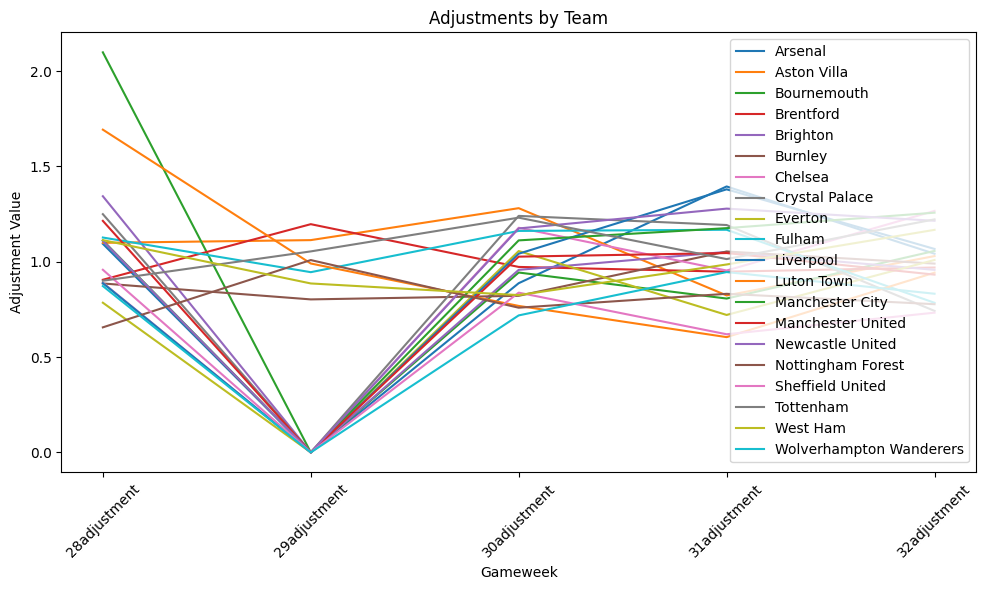

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming gwadjustments2428 is your dataframe containing the data

# Set 'team' column as index
gwadjustments2832.set_index('team', inplace=True)

# Transpose the dataframe
df_transposed = gwadjustments2832.transpose()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for team in df_transposed.columns:
    ax.plot(df_transposed.index.str.replace('gw', ''), df_transposed[team], label=team)

# Customizing the plot
ax.set_title('Adjustments by Team')
ax.set_xlabel('Gameweek')
ax.set_ylabel('Adjustment Value')
ax.legend()
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


In [51]:
rawdfgw228x = pd.merge(rawallplayersallgw,
                     gwadjustments2832,
                     on ='team',
                     how ='left')
rawdfgw228x.rename(columns = {'gw14adjustment_y':'gw14adjustment'}, inplace = True)
rawdfgw228x = rawdfgw228x.round(1)
rawdfgw228x

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,points_per_game,minutes,home_adjustment,xPallgw,xCSP,gw28adjustment,gw29adjustment,gw30adjustment,gw31adjustment,gw32adjustment
0,1,Arsenal,F,Balogun,4.4,0.2,0,0,0,0.0,...,0.0,0,1.2,2.0,NaN,1.1,0.0,0.9,1.4,1.0
1,8,Arsenal,F,G.Jesus,7.8,2.6,4,4,212,124.4,...,3.6,1117,1.2,3.0,NaN,1.1,0.0,0.9,1.4,1.0
2,13,Arsenal,F,Nketiah,5.1,3.5,5,4,205,74.6,...,2.8,1037,1.2,2.7,NaN,1.1,0.0,0.9,1.4,1.0
3,39,Aston Villa,F,Davis,4.9,0.1,0,0,0,0.0,...,0.0,0,1.1,2.0,NaN,1.1,1.1,1.3,0.8,1.0
4,44,Aston Villa,F,Duran,5.0,0.1,2,1,72,20.8,...,1.7,174,1.1,2.2,NaN,1.1,1.1,1.3,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,647,West Ham,G,Anang,4.0,0.1,0,0,0,0.0,...,0.0,0,1.0,1.9,-0.1,1.1,0.9,0.8,1.0,1.2
913,546,Wolverhampton Wanderers,G,Bentley,3.9,0.9,0,0,65,6.6,...,4.2,292,0.8,2.1,0.1,0.9,0.0,0.7,0.9,0.8
914,564,Wolverhampton Wanderers,G,King,3.9,0.7,0,0,0,0.0,...,0.0,0,0.8,2.1,0.1,0.9,0.0,0.7,0.9,0.8
915,569,Wolverhampton Wanderers,G,José Sá,5.0,1.6,0,0,408,55.8,...,3.0,2137,0.8,2.1,0.1,0.9,0.0,0.7,0.9,0.8


In [52]:
#gw3adjustments = gw3adjustments.groupby('team', as_index=False)['gw3adjustment'].aggregate('sum')
#gw3adjustments

In [53]:
rawdfgw228x['gw28'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw28adjustment)+2)
rawdfgw228x['gw29'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw29adjustment)+2)
rawdfgw228x['gw30'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw30adjustment)+2)
rawdfgw228x['gw31'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw31adjustment)+2)
rawdfgw228x['gw32'] = (((rawdfgw228x.xPallgw - 2)*rawdfgw228x.gw32adjustment)+2)

rawdfgw228x['5GW Total'] = rawdfgw228x.gw31 + rawdfgw228x.gw28 + rawdfgw228x.gw29 + rawdfgw228x.gw30 + rawdfgw228x.gw32
rawdfgw228x['3GW Total'] = rawdfgw228x.gw28 + rawdfgw228x.gw29 + rawdfgw228x.gw30
rawdfgw228x = rawdfgw228x.drop(columns=[
  'gw31adjustment',
  'gw28adjustment',
  'gw29adjustment',
  'gw30adjustment',
  'gw32adjustment'
  ])
rawdfgw228x

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,home_adjustment,xPallgw,xCSP,gw28,gw29,gw30,gw31,gw32,5GW Total,3GW Total
0,1,Arsenal,F,Balogun,4.4,0.2,0,0,0,0.0,...,1.2,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
1,8,Arsenal,F,G.Jesus,7.8,2.6,4,4,212,124.4,...,1.2,3.0,NaN,3.10,2.00,2.90,3.40,3.00,14.40,8.00
2,13,Arsenal,F,Nketiah,5.1,3.5,5,4,205,74.6,...,1.2,2.7,NaN,2.77,2.00,2.63,2.98,2.70,13.08,7.40
3,39,Aston Villa,F,Davis,4.9,0.1,0,0,0,0.0,...,1.1,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
4,44,Aston Villa,F,Duran,5.0,0.1,2,1,72,20.8,...,1.1,2.2,NaN,2.22,2.22,2.26,2.16,2.20,11.06,6.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,647,West Ham,G,Anang,4.0,0.1,0,0,0,0.0,...,1.0,1.9,-0.1,1.89,1.91,1.92,1.90,1.88,9.50,5.72
913,546,Wolverhampton Wanderers,G,Bentley,3.9,0.9,0,0,65,6.6,...,0.8,2.1,0.1,2.09,2.00,2.07,2.09,2.08,10.33,6.16
914,564,Wolverhampton Wanderers,G,King,3.9,0.7,0,0,0,0.0,...,0.8,2.1,0.1,2.09,2.00,2.07,2.09,2.08,10.33,6.16
915,569,Wolverhampton Wanderers,G,José Sá,5.0,1.6,0,0,408,55.8,...,0.8,2.1,0.1,2.09,2.00,2.07,2.09,2.08,10.33,6.16


In [54]:
rawdfgw228x.drop_duplicates(subset='name', keep='last', inplace=True)
rawdfgw228x

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,home_adjustment,xPallgw,xCSP,gw28,gw29,gw30,gw31,gw32,5GW Total,3GW Total
0,1,Arsenal,F,Balogun,4.4,0.2,0,0,0,0.0,...,1.2,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
1,8,Arsenal,F,G.Jesus,7.8,2.6,4,4,212,124.4,...,1.2,3.0,NaN,3.10,2.00,2.90,3.40,3.00,14.40,8.00
2,13,Arsenal,F,Nketiah,5.1,3.5,5,4,205,74.6,...,1.2,2.7,NaN,2.77,2.00,2.63,2.98,2.70,13.08,7.40
3,39,Aston Villa,F,Davis,4.9,0.1,0,0,0,0.0,...,1.1,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
4,44,Aston Villa,F,Duran,5.0,0.1,2,1,72,20.8,...,1.1,2.2,NaN,2.22,2.22,2.26,2.16,2.20,11.06,6.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,647,West Ham,G,Anang,4.0,0.1,0,0,0,0.0,...,1.0,1.9,-0.1,1.89,1.91,1.92,1.90,1.88,9.50,5.72
913,546,Wolverhampton Wanderers,G,Bentley,3.9,0.9,0,0,65,6.6,...,0.8,2.1,0.1,2.09,2.00,2.07,2.09,2.08,10.33,6.16
914,564,Wolverhampton Wanderers,G,King,3.9,0.7,0,0,0,0.0,...,0.8,2.1,0.1,2.09,2.00,2.07,2.09,2.08,10.33,6.16
915,569,Wolverhampton Wanderers,G,José Sá,5.0,1.6,0,0,408,55.8,...,0.8,2.1,0.1,2.09,2.00,2.07,2.09,2.08,10.33,6.16


In [55]:
from pandas import ExcelWriter
writer = ExcelWriter('API model.xlsx')
rawdfgw228x.to_excel(writer, sheet_name='Sheet1')
gwadjustments2832.to_excel(writer, sheet_name='Sheet2')
#fplwithunderstat.to_excel(writer, sheet_name='Sheet3')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

<ipython-input-55-25f42c7fec1e>:8: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [56]:
#from google.colab import drive
#drive.mount('/content/drive')

In [57]:
import shutil

In [58]:
#shutil.copy("/content/API model.xlsx","/content/drive/MyDrive/FPL")

In [60]:
rawdfgw228x.nlargest(50, '5GW Total')

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,home_adjustment,xPallgw,xCSP,gw28,gw29,gw30,gw31,gw32,5GW Total,3GW Total
79,355,Manchester City,F,Haaland,14.5,75.7,18,7,541,217.3,...,1.3,5.3,NaN,5.63,2.00,5.63,5.96,6.29,25.51,13.26
335,308,Liverpool,M,Salah,13.0,20.7,15,9,501,243.9,...,1.2,5.3,NaN,4.97,2.00,5.30,6.62,5.63,24.52,12.27
130,19,Arsenal,M,Saka,9.2,66.6,13,10,610,282.0,...,1.2,5.1,NaN,5.41,2.00,4.79,6.34,5.10,23.64,12.20
5,60,Aston Villa,F,Watkins,9.0,56.2,16,15,621,247.7,...,1.1,4.5,NaN,4.75,4.75,5.25,4.00,4.50,23.25,14.75
12,85,Bournemouth,F,Solanke,7.2,27.5,14,3,404,199.4,...,0.8,4.4,NaN,7.04,2.00,4.16,3.92,4.64,21.76,13.20
483,516,Tottenham,M,Son,9.8,23.5,13,6,490,199.4,...,1.0,4.0,NaN,3.80,4.20,4.40,4.00,4.40,20.80,12.40
488,526,West Ham,M,Bowen,7.9,21.7,14,3,404,189.2,...,1.0,4.1,NaN,4.31,3.89,3.68,4.10,4.52,20.50,11.88
56,293,Liverpool,F,Darwin,7.5,14.3,10,9,344,185.4,...,1.2,4.3,NaN,4.07,2.00,4.30,5.22,4.53,20.12,10.37
207,108,Brentford,M,Mbeumo,6.7,5.8,7,4,250,122.1,...,1.1,4.0,NaN,3.80,4.40,4.00,3.80,4.00,20.00,12.20
387,353,Manchester City,M,Foden,8.2,34.4,11,7,615,263.1,...,1.3,4.1,NaN,4.31,2.00,4.31,4.52,4.73,19.87,10.62


In [61]:
rawdfgw228x.nlargest(50, '3GW Total')

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,home_adjustment,xPallgw,xCSP,gw28,gw29,gw30,gw31,gw32,5GW Total,3GW Total
5,60,Aston Villa,F,Watkins,9.0,56.2,16,15,621,247.7,...,1.1,4.5,NaN,4.75,4.75,5.25,4.00,4.50,23.25,14.75
79,355,Manchester City,F,Haaland,14.5,75.7,18,7,541,217.3,...,1.3,5.3,NaN,5.63,2.00,5.63,5.96,6.29,25.51,13.26
12,85,Bournemouth,F,Solanke,7.2,27.5,14,3,404,199.4,...,0.8,4.4,NaN,7.04,2.00,4.16,3.92,4.64,21.76,13.20
483,516,Tottenham,M,Son,9.8,23.5,13,6,490,199.4,...,1.0,4.0,NaN,3.80,4.20,4.40,4.00,4.40,20.80,12.40
335,308,Liverpool,M,Salah,13.0,20.7,15,9,501,243.9,...,1.2,5.3,NaN,4.97,2.00,5.30,6.62,5.63,24.52,12.27
130,19,Arsenal,M,Saka,9.2,66.6,13,10,610,282.0,...,1.2,5.1,NaN,5.41,2.00,4.79,6.34,5.10,23.64,12.20
207,108,Brentford,M,Mbeumo,6.7,5.8,7,4,250,122.1,...,1.1,4.0,NaN,3.80,4.40,4.00,3.80,4.00,20.00,12.20
488,526,West Ham,M,Bowen,7.9,21.7,14,3,404,189.2,...,1.0,4.1,NaN,4.31,3.89,3.68,4.10,4.52,20.50,11.88
145,43,Aston Villa,M,Douglas Luiz,5.7,13.8,9,5,580,171.7,...,1.1,3.6,NaN,3.76,3.76,4.08,3.28,3.60,18.48,11.60
480,509,Tottenham,M,Richarlison,7.0,5.6,10,3,262,136.7,...,1.0,3.7,NaN,3.53,3.87,4.04,3.70,4.04,19.18,11.44


In [62]:
Top50 = rawdfgw228x.nlargest(50, '5GW Total')
Top50

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,home_adjustment,xPallgw,xCSP,gw28,gw29,gw30,gw31,gw32,5GW Total,3GW Total
79,355,Manchester City,F,Haaland,14.5,75.7,18,7,541,217.3,...,1.3,5.3,NaN,5.63,2.00,5.63,5.96,6.29,25.51,13.26
335,308,Liverpool,M,Salah,13.0,20.7,15,9,501,243.9,...,1.2,5.3,NaN,4.97,2.00,5.30,6.62,5.63,24.52,12.27
130,19,Arsenal,M,Saka,9.2,66.6,13,10,610,282.0,...,1.2,5.1,NaN,5.41,2.00,4.79,6.34,5.10,23.64,12.20
5,60,Aston Villa,F,Watkins,9.0,56.2,16,15,621,247.7,...,1.1,4.5,NaN,4.75,4.75,5.25,4.00,4.50,23.25,14.75
12,85,Bournemouth,F,Solanke,7.2,27.5,14,3,404,199.4,...,0.8,4.4,NaN,7.04,2.00,4.16,3.92,4.64,21.76,13.20
483,516,Tottenham,M,Son,9.8,23.5,13,6,490,199.4,...,1.0,4.0,NaN,3.80,4.20,4.40,4.00,4.40,20.80,12.40
488,526,West Ham,M,Bowen,7.9,21.7,14,3,404,189.2,...,1.0,4.1,NaN,4.31,3.89,3.68,4.10,4.52,20.50,11.88
56,293,Liverpool,F,Darwin,7.5,14.3,10,9,344,185.4,...,1.2,4.3,NaN,4.07,2.00,4.30,5.22,4.53,20.12,10.37
207,108,Brentford,M,Mbeumo,6.7,5.8,7,4,250,122.1,...,1.1,4.0,NaN,3.80,4.40,4.00,3.80,4.00,20.00,12.20
387,353,Manchester City,M,Foden,8.2,34.4,11,7,615,263.1,...,1.3,4.1,NaN,4.31,2.00,4.31,4.52,4.73,19.87,10.62


In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string

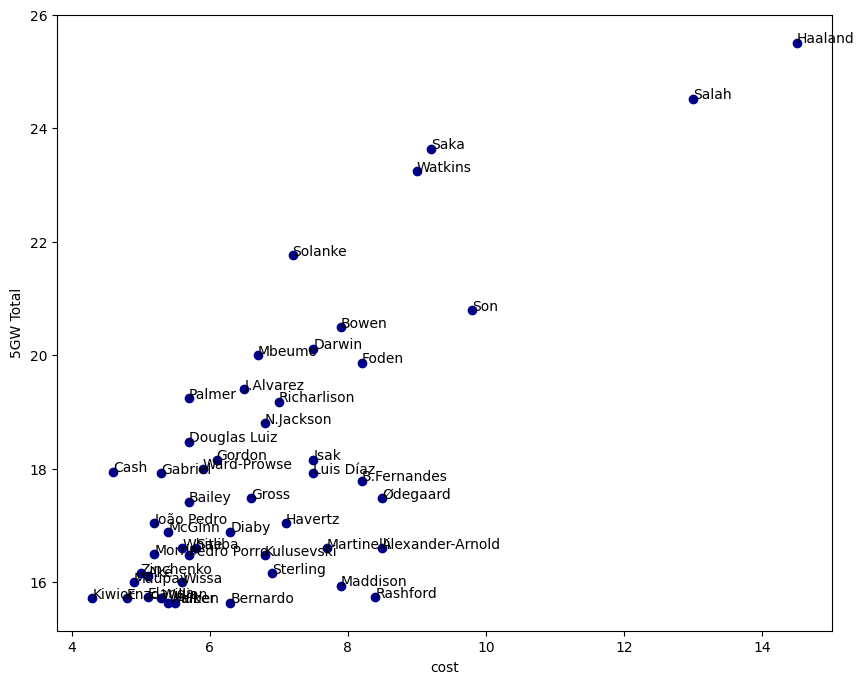

In [64]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.scatter(x=Top50['cost'],y=Top50['5GW Total'],c='DarkBlue')
# set labels
ax.set_xlabel('cost')
ax.set_ylabel('5GW Total')

# annotate points in axis
for idx, row in Top50.iterrows():
    ax.annotate(row['name'], (row['cost'], row['5GW Total']) )
# force matplotlib to draw the graph
plt.show()

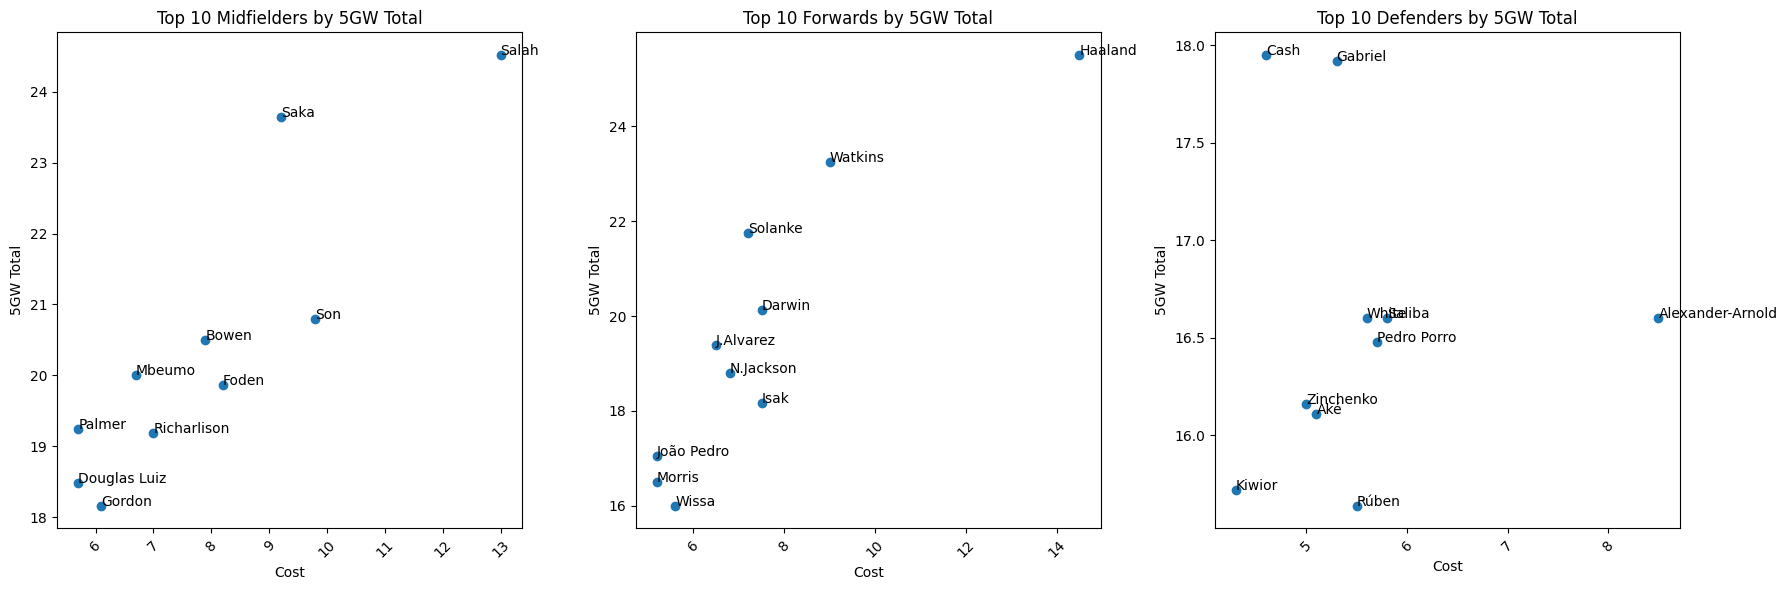

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'Top50'

# Filter the DataFrame by position type
midfielders = Top50[Top50['pos'] == 'M']
forwards = Top50[Top50['pos'] == 'F']
defenders = Top50[Top50['pos'] == 'D']

# Plotting the scatter plots
plt.figure(figsize=(18, 6))

# Midfielders scatter plot
plt.subplot(131)
plt.scatter(midfielders['cost'][:10], midfielders['5GW Total'][:10])
plt.title('Top 10 Midfielders by 5GW Total')
plt.xlabel('Cost')
plt.ylabel('5GW Total')
plt.xticks(rotation=45)
for idx, row in midfielders.head(10).iterrows():
    plt.annotate(row['name'], (row['cost'], row['5GW Total']))

# Forwards scatter plot
plt.subplot(132)
plt.scatter(forwards['cost'][:10], forwards['5GW Total'][:10])
plt.title('Top 10 Forwards by 5GW Total')
plt.xlabel('Cost')
plt.ylabel('5GW Total')
plt.xticks(rotation=45)
for idx, row in forwards.head(10).iterrows():
    plt.annotate(row['name'], (row['cost'], row['5GW Total']))

# Defenders scatter plot
plt.subplot(133)
plt.scatter(defenders['cost'][:10], defenders['5GW Total'][:10])
plt.title('Top 10 Defenders by 5GW Total')
plt.xlabel('Cost')
plt.ylabel('5GW Total')
plt.xticks(rotation=45)
for idx, row in defenders.head(10).iterrows():
    plt.annotate(row['name'], (row['cost'], row['5GW Total']))

plt.tight_layout()
plt.show()


In [66]:
rawdfgw228x

,id,team,pos,name,cost,selected_by_percent,goals_scored,assists,bps,ict_index,...,home_adjustment,xPallgw,xCSP,gw28,gw29,gw30,gw31,gw32,5GW Total,3GW Total
0,1,Arsenal,F,Balogun,4.4,0.2,0,0,0,0.0,...,1.2,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
1,8,Arsenal,F,G.Jesus,7.8,2.6,4,4,212,124.4,...,1.2,3.0,NaN,3.10,2.00,2.90,3.40,3.00,14.40,8.00
2,13,Arsenal,F,Nketiah,5.1,3.5,5,4,205,74.6,...,1.2,2.7,NaN,2.77,2.00,2.63,2.98,2.70,13.08,7.40
3,39,Aston Villa,F,Davis,4.9,0.1,0,0,0,0.0,...,1.1,2.0,NaN,2.00,2.00,2.00,2.00,2.00,10.00,6.00
4,44,Aston Villa,F,Duran,5.0,0.1,2,1,72,20.8,...,1.1,2.2,NaN,2.22,2.22,2.26,2.16,2.20,11.06,6.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,647,West Ham,G,Anang,4.0,0.1,0,0,0,0.0,...,1.0,1.9,-0.1,1.89,1.91,1.92,1.90,1.88,9.50,5.72
913,546,Wolverhampton Wanderers,G,Bentley,3.9,0.9,0,0,65,6.6,...,0.8,2.1,0.1,2.09,2.00,2.07,2.09,2.08,10.33,6.16
914,564,Wolverhampton Wanderers,G,King,3.9,0.7,0,0,0,0.0,...,0.8,2.1,0.1,2.09,2.00,2.07,2.09,2.08,10.33,6.16
915,569,Wolverhampton Wanderers,G,José Sá,5.0,1.6,0,0,408,55.8,...,0.8,2.1,0.1,2.09,2.00,2.07,2.09,2.08,10.33,6.16


In [67]:
apiplayers = master

In [68]:
Mostselected = apiplayers.nlargest(20, 'selected_by_percent')
Mostselected

,id,team,pos,name,cost,selected_by_percent,expected_goals,expected_assists,goals_scored,assists,bps,ict_index,points,points_per_game,minutes,apppoint,assistvalue
509,355,Manchester City,F,Haaland,14.5,75.7,21.15,1.66,18,7,541,217.3,152,6.9,1832,2,3
17,19,Arsenal,M,Saka,9.2,66.6,11.44,8.72,13,10,610,282.0,176,6.8,2175,2,3
64,60,Aston Villa,F,Watkins,9.0,56.2,14.20,3.48,16,15,621,247.7,183,6.8,2389,2,3
18,20,Arsenal,D,Saliba,5.8,40.0,1.54,0.76,2,1,537,74.3,110,4.1,2430,2,3
599,430,Newcastle United,D,Trippier,6.8,38.5,0.65,6.90,1,10,574,180.2,108,4.3,2163,2,3
758,524,West Ham,G,Areola,4.2,36.2,0.00,0.00,0,0,475,77.3,99,4.1,2115,2,3
279,362,Chelsea,M,Palmer,5.7,34.6,8.30,5.11,10,8,439,168.8,129,5.6,1664,2,3
507,353,Manchester City,M,Foden,8.2,34.4,8.07,5.60,11,7,615,263.1,158,5.9,2220,2,3
102,85,Bournemouth,F,Solanke,7.2,27.5,14.82,1.46,14,3,404,199.4,130,5.0,2315,2,3
4,5,Arsenal,D,Gabriel,5.3,27.4,3.11,0.51,3,1,463,91.7,102,4.1,2084,2,3


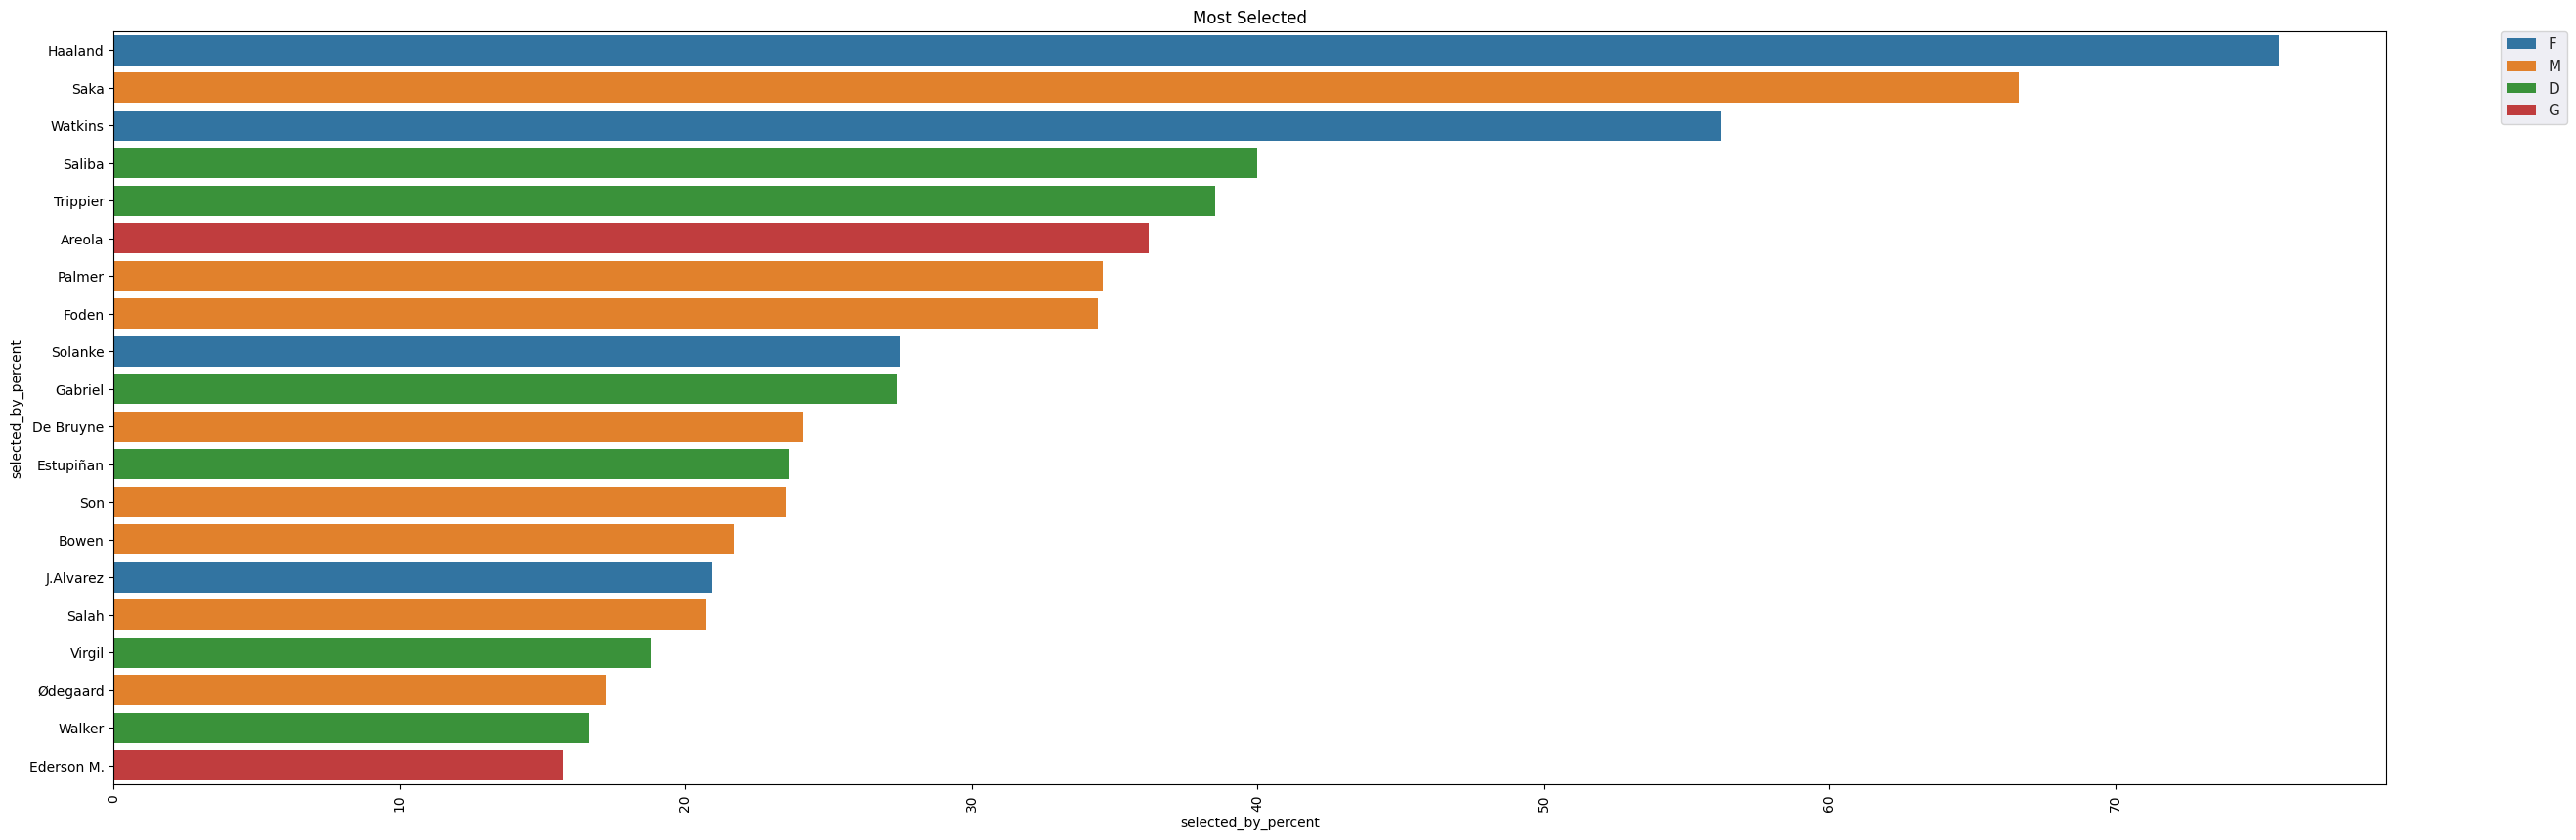

In [69]:
ax = sns.barplot(x='selected_by_percent', y='name', data=Mostselected, hue='pos', dodge=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("Most Selected")
plt.xticks(rotation=90)
plt.ylabel("selected_by_percent")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.gcf().set_size_inches(30,10)

In [70]:
fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltablexGxGc = epltable.drop(columns=[
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])
epltablexGxGc= epltablexGxGc.replace('Newcastle Utd', 'Newcastle United')
epltablexGxGc= epltablexGxGc.replace('Wolves','Wolverhampton Wanderers')
epltablexGxGc= epltablexGxGc.replace('Leeds United','Leeds')
epltablexGxGc= epltablexGxGc.replace('Leicester City','Leicester')
epltablexGxGc= epltablexGxGc.replace('Manchester Utd','Manchester United')
epltablexGxGc['Squad'] = epltablexGxGc['Squad'].str.replace(r"[\"\',]", '')
epltablexGxGc= epltablexGxGc.replace('Nottham Forest','Nottingham Forest')
epltablexGxGc['xCSP'] = (4 - (epltablexGxGc.xGA * 4/21))
epltablexGxGc.rename(columns={'Squad': 'team'}, inplace=True)
epltablexGxGc['xG/90'] = (epltablexGxGc.xG / epltablexGxGc.MP)
epltablexGxGc['xGA/90'] = (epltablexGxGc.xGA / epltablexGxGc.MP)
epltablexGxGc

<ipython-input-70-ccafbf71d20a>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  epltablexGxGc['Squad'] = epltablexGxGc['Squad'].str.replace(r"[\"\',]", '')


,Rk,team,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,xCSP,xG/90,xGA/90
0,1,Liverpool,27,19,6,2,64,25,39,63,2.33,59.9,32.9,26.9,1.00,-2.266667,2.218519,1.218519
1,2,Manchester City,27,19,5,3,62,27,35,62,2.30,55.0,24.9,30.1,1.12,-0.742857,2.037037,0.922222
2,3,Arsenal,27,19,4,4,68,23,45,61,2.26,55.3,18.4,36.9,1.37,0.495238,2.048148,0.681481
3,4,Aston Villa,27,17,4,6,59,37,22,55,2.04,50.2,38.3,11.9,0.44,-3.295238,1.859259,1.418519
4,5,Tottenham,26,15,5,6,55,39,16,50,1.92,45.4,43.0,2.4,0.09,-4.190476,1.746154,1.653846
5,6,Manchester United,27,14,2,11,37,39,-2,44,1.63,40.6,45.8,-5.3,-0.20,-4.723810,1.503704,1.696296
6,7,West Ham,27,12,6,9,43,47,-4,42,1.56,36.9,49.6,-12.7,-0.47,-5.447619,1.366667,1.837037
7,8,Newcastle United,27,12,4,11,57,45,12,40,1.48,50.4,47.6,2.8,0.10,-5.066667,1.866667,1.762963
8,9,Brighton,27,10,9,8,49,44,5,39,1.44,45.1,38.0,7.1,0.26,-3.238095,1.670370,1.407407
9,10,Wolverhampton Wanderers,27,11,5,11,40,43,-3,38,1.41,36.7,45.3,-8.5,-0.32,-4.628571,1.359259,1.677778


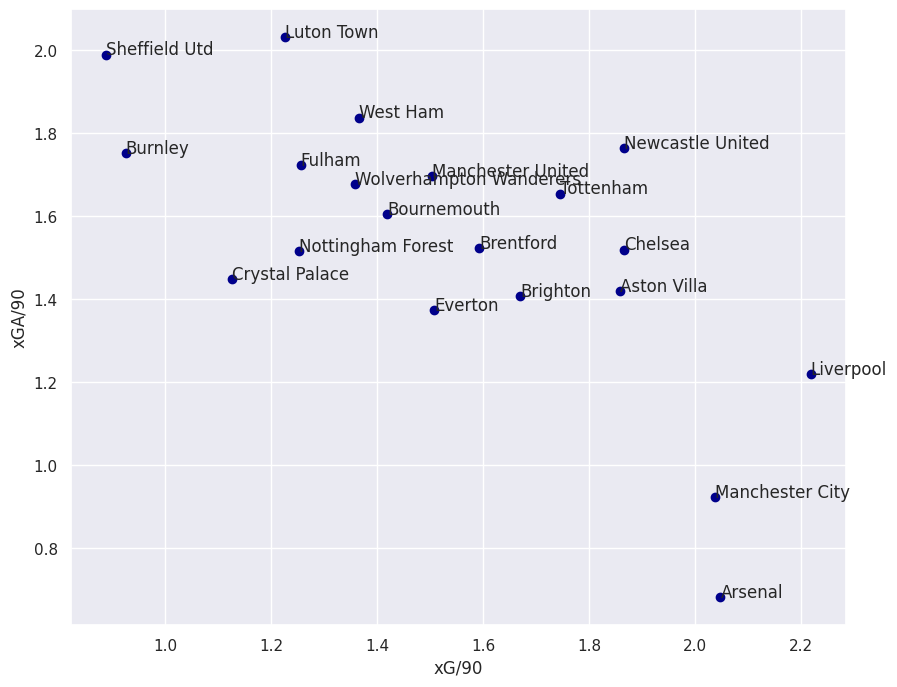

In [71]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.scatter(x=epltablexGxGc['xG/90'],y=epltablexGxGc['xGA/90'],c='DarkBlue')
# set labels
ax.set_xlabel('xG/90')
ax.set_ylabel('xGA/90')

# annotate points in axis
for idx, row in epltablexGxGc.iterrows():
    ax.annotate(row['team'], (row['xG/90'], row['xGA/90']) )
# force matplotlib to draw the graph
plt.show()

In [81]:
import plotly.graph_objects as go

# Create the figure object
fig = go.Figure()

# Add trace for GA
fig.add_trace(go.Scatter(
    x=epltablexGxGc_sorted['GA'],
    y=epltablexGxGc_sorted['team'],
    mode='markers',
    marker_color='darkorange',
    marker_size=10,
    name='GA'
))

# Add trace for xGA
fig.add_trace(go.Scatter(
    x=epltablexGxGc_sorted['xGA'],
    y=epltablexGxGc_sorted['team'],
    mode='markers',
    marker_color='darkblue',
    marker_size=10,
    name='xGA'
))

# Add line connecting GA and xGA
for i, team in enumerate(epltablexGxGc_sorted['team']):
    fig.add_shape(
        type='line',
        x0=epltablexGxGc_sorted.loc[i, 'GA'],
        y0=team,
        x1=epltablexGxGc_sorted.loc[i, 'xGA'],
        y1=team,
        line=dict(color='crimson', width=3)
    )

# Update layout
fig.update_layout(
    title="Goals Against (GA) vs. Expected Goals Against (xGA)",
    title_font_size=30,
    xaxis=dict(title="Goals Against (GA)"),
    yaxis=dict(title="Team"),
    hovermode="y",
    height=800,  # Set the height of the chart
    width=1000   # Set the width of the chart
)

# Show the plot
fig.show()


In [72]:
EPL_player_df

,id,player_name,games_x,time_x,goals_1wks_x,xG_1wks_x,assists_1wks_x,xA_1wks_x,shots_1wks_x,key_passes_1wks_x,...,shots_1wks_y,key_passes_1wks_y,yellow_cards,red_cards,position_y,team_title_y,npg_1wks_y,npxG_1wks_y,xGChain,xGBuildup
0,8260,Erling Haaland,22,1849,18,22.268411308526993,5,3.889001840725541,91,22,...,91,22,1,0,F S,Manchester City,15,19.223736137151718,22.561486311256886,2.0062904562801123
1,8865,Ollie Watkins,27,2409,16,16.266097329556942,10,5.876053761690855,85,37,...,85,37,4,0,F,Aston Villa,16,16.266097329556942,24.363870412111282,4.546155463904142
2,1250,Mohamed Salah,21,1815,15,14.35135069489479,9,10.167602833360434,67,49,...,67,49,2,0,F S,Liverpool,11,9.784411862492561,21.048484906554222,5.75809583067894
3,1679,Dominic Solanke,26,2333,14,15.619912099093199,3,2.3902590684592724,80,24,...,80,24,2,0,F,Bournemouth,13,14.858743246644735,16.06937814503908,2.257373197004199
4,1776,Jarrod Bowen,26,2340,14,10.528724770992994,3,4.039636945351958,63,18,...,63,18,2,0,F M,West Ham,14,10.528724770992994,13.181600715965033,2.224017422646284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,12412,Morgan Rogers,3,65,0,0.32956793159246445,0,0.22922202944755554,3,2,...,3,2,1,0,S,Aston Villa,0,0.32956793159246445,0.6201528459787369,0.17389893531799316
540,12418,Rodrigo Ribeiro,1,1,0,0,0,0,0,0,...,0,0,0,0,S,Nottingham Forest,0,0,0,0
541,12449,Oliver Arblaster,1,21,0,0,0,0.045631736516952515,0,1,...,0,1,0,0,S,Sheffield United,0,0,0.045631736516952515,0
542,12455,Jayden Danns,2,6,0,0,0,0,0,0,...,0,0,1,0,S,Liverpool,0,0,0,0


In [73]:
EPL_player_df['goals'] = EPL_player_df['goals_1wks_x'].astype(int)
top25goals = EPL_player_df.nlargest(20, 'goals')
top25goals

,id,player_name,games_x,time_x,goals_1wks_x,xG_1wks_x,assists_1wks_x,xA_1wks_x,shots_1wks_x,key_passes_1wks_x,...,key_passes_1wks_y,yellow_cards,red_cards,position_y,team_title_y,npg_1wks_y,npxG_1wks_y,xGChain,xGBuildup,goals
0,8260,Erling Haaland,22,1849,18,22.268411308526993,5,3.889001840725541,91,22,...,22,1,0,F S,Manchester City,15,19.223736137151718,22.561486311256886,2.0062904562801123,18
1,8865,Ollie Watkins,27,2409,16,16.266097329556942,10,5.876053761690855,85,37,...,37,4,0,F,Aston Villa,16,16.266097329556942,24.363870412111282,4.546155463904142,16
2,1250,Mohamed Salah,21,1815,15,14.35135069489479,9,10.167602833360434,67,49,...,49,2,0,F S,Liverpool,11,9.784411862492561,21.048484906554222,5.75809583067894,15
3,1679,Dominic Solanke,26,2333,14,15.619912099093199,3,2.3902590684592724,80,24,...,24,2,0,F,Bournemouth,13,14.858743246644735,16.06937814503908,2.257373197004199,14
4,1776,Jarrod Bowen,26,2340,14,10.528724770992994,3,4.039636945351958,63,18,...,18,2,0,F M,West Ham,14,10.528724770992994,13.181600715965033,2.224017422646284,14
5,453,Son Heung-Min,23,1941,13,8.323228970170021,6,8.240405775606632,57,43,...,43,1,0,F M S,Tottenham,12,7.562060132622719,19.30395220220089,7.007491825148463,13
6,7322,Bukayo Saka,26,2221,13,12.498825915157795,7,8.633971199393272,78,64,...,64,3,0,F,Arsenal,9,9.454150602221489,23.217771366238594,10.452872704714537,13
7,5232,Alexander Isak,19,1343,11,11.567758813500404,0,1.3759422898292542,41,12,...,12,0,0,F S,Newcastle United,9,10.045421078801155,12.462995760142803,2.939927790313959,11
8,6055,Phil Foden,27,2230,11,8.623580945655704,7,6.921484284102917,83,57,...,57,1,0,F M S,Manchester City,11,8.623580945655704,22.91165916621685,12.475542699918151,11
9,6026,Richarlison,22,1381,10,9.048062501475215,3,1.6384554393589497,56,14,...,14,3,0,F M S,Tottenham,10,9.048062501475215,11.794333040714264,2.2480600606650114,10


In [74]:
EPL_player_df['assists'] = EPL_player_df['assists_1wks_x'].astype(int)
top25assists = EPL_player_df.nlargest(20, 'assists')
top25assists

,id,player_name,games_x,time_x,goals_1wks_x,xG_1wks_x,assists_1wks_x,xA_1wks_x,shots_1wks_x,key_passes_1wks_x,...,yellow_cards,red_cards,position_y,team_title_y,npg_1wks_y,npxG_1wks_y,xGChain,xGBuildup,goals,assists
1,8865,Ollie Watkins,27,2409,16,16.266097329556942,10,5.876053761690855,85,37,...,4,0,F,Aston Villa,16,16.266097329556942,24.363870412111282,4.546155463904142,16,10
60,239,Pascal Groß,25,2117,4,5.004330199211836,10,7.234846423380077,45,72,...,4,0,D M S,Brighton,3,4.243161361664534,18.139803618192673,13.357751889154315,4,10
169,652,Kieran Trippier,25,2184,1,0.6469280309975147,10,8.480502588674426,8,64,...,5,0,D,Newcastle United,1,0.6469280309975147,13.82457920908928,10.365714758634567,1,10
2,1250,Mohamed Salah,21,1815,15,14.35135069489479,9,10.167602833360434,67,49,...,2,0,F S,Liverpool,11,9.784411862492561,21.048484906554222,5.75809583067894,15,9
125,6382,Pedro Neto,18,1474,2,3.1913340650498867,9,5.216042526066303,34,37,...,4,0,F M S,Wolverhampton Wanderers,2,3.1913340650498867,8.664614200592041,2.2079212702810764,2,9
19,5221,Leon Bailey,25,1373,8,4.538940733298659,8,7.430842328816652,40,35,...,4,0,M S,Aston Villa,8,4.538940733298659,14.589275769889355,6.401538774371147,8,8
6,7322,Bukayo Saka,26,2221,13,12.498825915157795,7,8.633971199393272,78,64,...,3,0,F,Arsenal,9,9.454150602221489,23.217771366238594,10.452872704714537,13,7
8,6055,Phil Foden,27,2230,11,8.623580945655704,7,6.921484284102917,83,57,...,1,0,F M S,Manchester City,11,8.623580945655704,22.91165916621685,12.475542699918151,11,7
10,8497,Cole Palmer,23,1669,10,8.617130061611533,7,6.416006930172443,54,34,...,7,0,F M S,"Chelsea,Manchester City",5,4.811285795643926,17.64099690504372,9.48515598475933,10,7
12,10720,Darwin Núñez,25,1499,10,15.10378307197243,7,4.8897860115394,84,27,...,8,0,F S,Liverpool,10,14.342614174820483,19.279402311891317,3.0453371480107307,10,7


In [75]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [76]:
fig3= go.Figure()
fig3.add_trace(go.Scatter(x = top25goals["goals"],
                          y = top25goals["player_name"],
                          mode = 'markers',
                          marker_color = 'darkblue',
                          marker_size = 10,
                          name = 'goals'))
fig3.add_trace(go.Scatter(x = top25goals["xG_1wks_x"],
                          y = top25goals["player_name"],
                          mode = 'markers',
                          marker_color = 'darkorange',
                          marker_size = 10,
                          name = 'xG'))
for i in range(0, len(top25goals)):
               fig3.add_shape(type='line',
                              x0 = top25goals["goals"][i],
                              y0 = i,
                              x1 = top25goals["xG_1wks_x"][i],
                              y1 = i,
                              line=dict(color='crimson', width = 3))
fig3.update_layout(title_text =
                    "Goals vs xG",
                    title_font_size = 30)
fig3.update_xaxes(range=[0, 30])
fig3.show()

In [82]:
seasonedit = one_game_df.drop(columns=[ 'yellow_cards','red_cards','time'])

In [83]:
top25assists.columns

Index(['id', 'player_name', 'games_x', 'time_x', 'goals_1wks_x', 'xG_1wks_x',
       'assists_1wks_x', 'xA_1wks_x', 'shots_1wks_x', 'key_passes_1wks_x',
       'yellow_cards_x', 'red_cards_x', 'position_x', 'team_title_x',
       'npg_1wks_x', 'npxG_1wks_x', 'xGChain_x', 'xGBuildup_x', 'games_y',
       'time_y', 'goals_season', 'xG_season', 'assists_season', 'xA_season',
       'shots_season', 'key_passes_season', 'yellow_cards_y', 'red_cards_y',
       'npg_season', 'npxG_season', 'xGChain_y', 'xGBuildup_y', 'games',
       'time', 'goals_1wks_y', 'xG_1wks_y', 'assists_1wks_y', 'xA_1wks_y',
       'shots_1wks_y', 'key_passes_1wks_y', 'yellow_cards', 'red_cards',
       'position_y', 'team_title_y', 'npg_1wks_y', 'npxG_1wks_y', 'xGChain',
       'xGBuildup', 'goals', 'assists'],
      dtype='object')

In [84]:
top20assists = top25assists.drop(columns=[ 'shots_1wks_x', 'key_passes_1wks_x',
       'yellow_cards_x', 'red_cards_x', 'position_x', 'team_title_x',
       'npg_1wks_x', 'npxG_1wks_x', 'xGChain_x', 'xGBuildup_x', 'games_y',
       'time_y', 'goals_season', 'xG_season', 'assists_season', 'xA_season',
       'shots_season', 'key_passes_season', 'yellow_cards_y', 'red_cards_y',
       'npg_season', 'npxG_season', 'xGChain_y', 'xGBuildup_y', 'games',
       'time', 'goals_1wks_y', 'xG_1wks_y', 'assists_1wks_y', 'xA_1wks_y',
       'shots_1wks_y', 'key_passes_1wks_y', 'yellow_cards', 'red_cards',
       'position_y', 'team_title_y', 'npg_1wks_y', 'npxG_1wks_y', 'xGChain',
       'xGBuildup', 'assists_1wks_x', 'games_x', 'time_x', 'goals_1wks_x', 'id' ])

top20assists.reset_index(inplace = True,drop = True)
top20assists

,player_name,xG_1wks_x,xA_1wks_x,goals,assists
0,Ollie Watkins,16.266097329556942,5.876053761690855,16,10
1,Pascal Groß,5.004330199211836,7.234846423380077,4,10
2,Kieran Trippier,0.6469280309975147,8.480502588674426,1,10
3,Mohamed Salah,14.35135069489479,10.167602833360434,15,9
4,Pedro Neto,3.1913340650498867,5.216042526066303,2,9
5,Leon Bailey,4.538940733298659,7.430842328816652,8,8
6,Bukayo Saka,12.498825915157795,8.633971199393272,13,7
7,Phil Foden,8.623580945655704,6.921484284102917,11,7
8,Cole Palmer,8.617130061611533,6.416006930172443,10,7
9,Darwin Núñez,15.10378307197243,4.8897860115394,10,7


In [85]:
fig4= go.Figure()
fig4.add_trace(go.Scatter(x = top20assists["assists"],
                          y = top20assists["player_name"],
                          mode = 'markers',
                          marker_color = 'darkblue',
                          marker_size = 10,
                          name = 'assists'))
fig4.add_trace(go.Scatter(x = top20assists["xA_1wks_x"],
                          y = top20assists["player_name"],
                          mode = 'markers',
                          marker_color = 'darkorange',
                          marker_size = 10,
                          name = 'xA'))
for i in range(0, len(top20assists)):
               fig4.add_shape(type='line',
                              x0 = top20assists['assists'][i],
                              y0 = i,
                              x1 = top20assists["xA_1wks_x"][i],
                              y1 = i,
                              line=dict(color='crimson', width = 3))
fig4.update_layout(title_text =
                    "assists vs xA",
                    title_font_size = 15)
fig4.update_xaxes(range=[0, 15])
fig4.show()

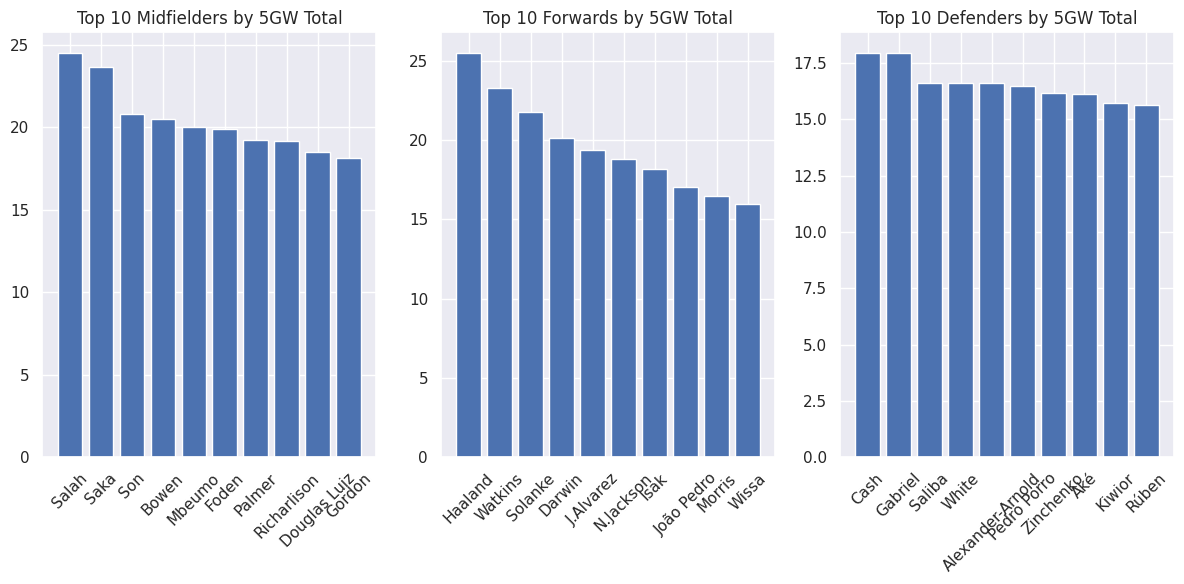

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'Top50'

# Filter the DataFrame by position type
midfielders = Top50[Top50['pos'] == 'M']
forwards = Top50[Top50['pos'] == 'F']
defenders = Top50[Top50['pos'] == 'D']

# Sort the filtered DataFrames by '5GW Total' in descending order
midfielders = midfielders.sort_values(by='5GW Total', ascending=False)
forwards = forwards.sort_values(by='5GW Total', ascending=False)
defenders = defenders.sort_values(by='5GW Total', ascending=False)

# Plotting the bar charts
plt.figure(figsize=(12, 6))

# Midfielders chart
plt.subplot(131)
plt.bar(midfielders['name'][:10], midfielders['5GW Total'][:10])
plt.title('Top 10 Midfielders by 5GW Total')
plt.xticks(rotation=45)

# Forwards chart
plt.subplot(132)
plt.bar(forwards['name'][:10], forwards['5GW Total'][:10])
plt.title('Top 10 Forwards by 5GW Total')
plt.xticks(rotation=45)

# Defenders chart
plt.subplot(133)
plt.bar(defenders['name'][:10], defenders['5GW Total'][:10])
plt.title('Top 10 Defenders by 5GW Total')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


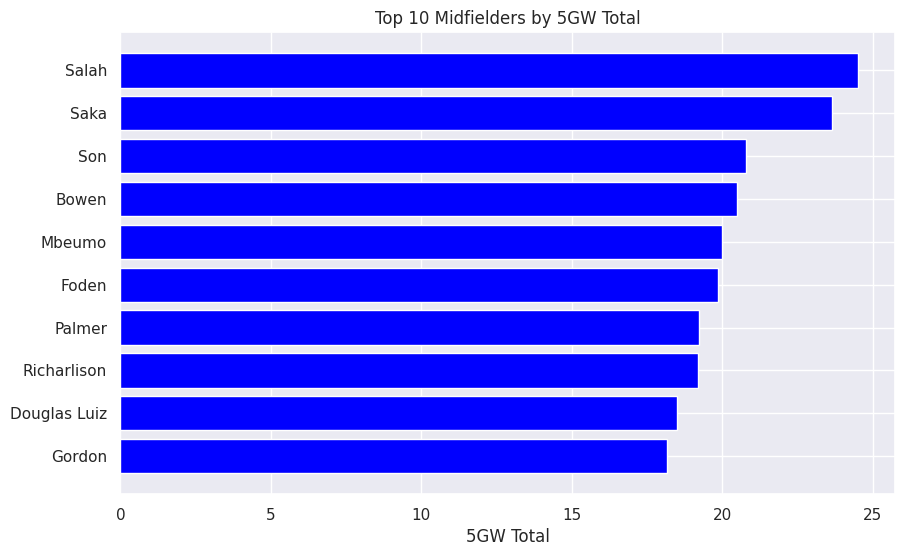

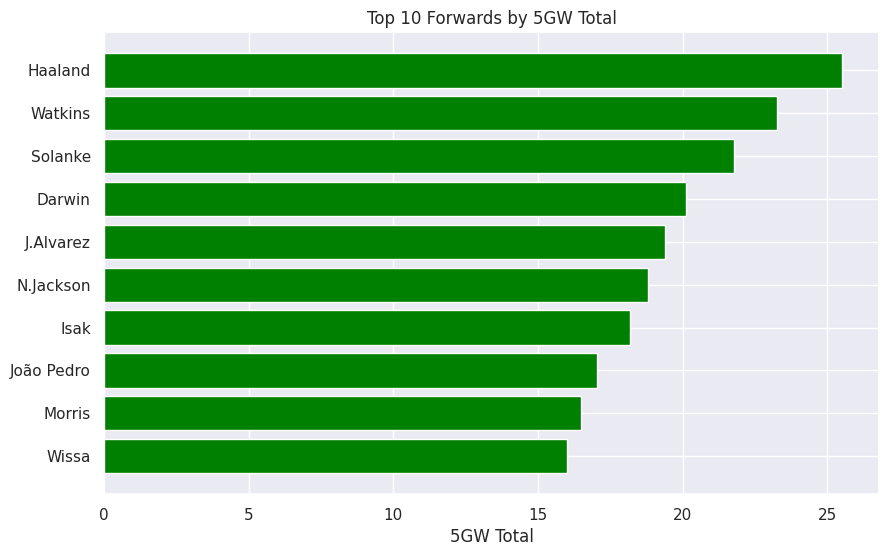

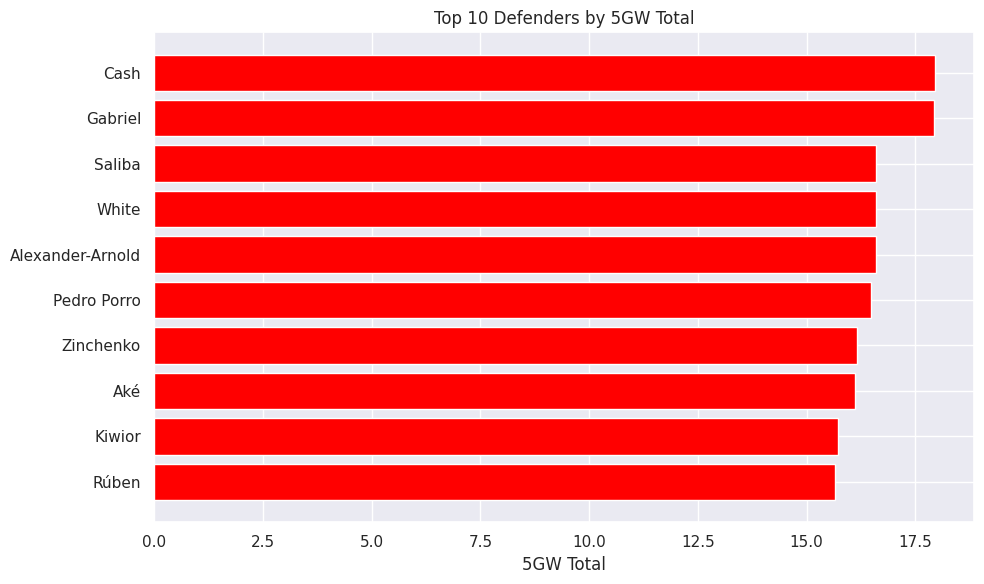

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'Top50'

# Filter the DataFrame by position type
midfielders = Top50[Top50['pos'] == 'M']
forwards = Top50[Top50['pos'] == 'F']
defenders = Top50[Top50['pos'] == 'D']

# Sort the filtered DataFrames by '5GW Total' in descending order
midfielders = midfielders.sort_values(by='5GW Total', ascending=False)
forwards = forwards.sort_values(by='5GW Total', ascending=False)
defenders = defenders.sort_values(by='5GW Total', ascending=False)

# Create a list of colors for each chart
colors = ['blue', 'green', 'red']

# Plotting the horizontal bar charts with different colors
plt.figure(figsize=(10, 6))

# Midfielders chart
plt.barh(midfielders['name'][:10], midfielders['5GW Total'][:10], color=colors[0])
plt.title('Top 10 Midfielders by 5GW Total')
plt.xlabel('5GW Total')
plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top

# Forwards chart
plt.figure(figsize=(10, 6))
plt.barh(forwards['name'][:10], forwards['5GW Total'][:10], color=colors[1])
plt.title('Top 10 Forwards by 5GW Total')
plt.xlabel('5GW Total')
plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top

# Defenders chart
plt.figure(figsize=(10, 6))
plt.barh(defenders['name'][:10], defenders['5GW Total'][:10], color=colors[2])
plt.title('Top 10 Defenders by 5GW Total')
plt.xlabel('5GW Total')
plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top

plt.tight_layout()
plt.show()


In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'gwadjustments26'

# Sort the DataFrame by values in descending order
gw25adjustments_sorted = gw25adjustments.sort_values(by=gw25adjustments.columns[0], ascending=False)

# Define custom color map with red, orange, and green
custom_colors = ["#FF0000", "#FFA500", "#00FF00"]
custom_cmap = sns.color_palette(custom_colors, as_cmap=True)

# Plot the heatmap with custom colors
plt.figure(figsize=(8, 6))
sns.heatmap(gw25adjustments_sorted, annot=True, cmap=custom_cmap, center=1,
            vmin=0.9, vmax=1.1, cbar_kws={'ticks': [0.9, 1, 1.1], 'format': '%.1f'})
plt.title('Color-Coded Table of GW Adjustments (Custom Colors)')
plt.show()



NameError: name 'gw25adjustments' is not defined

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'gwadjustments21'

# Sort the DataFrame by values in descending order
gw21adjustments_sorted = gw21adjustments.sort_values(by='gw21adjustment', ascending=False)

# Define custom color map with red, orange, and green
custom_colors = ["#FF0000", "#FFA500", "#00FF00"]
custom_cmap = sns.color_palette(custom_colors)

# Set the figure size
plt.figure(figsize=(10, 6))

scores_columns = ['gw21adjustment', 'gw22adjustment', 'gw23adjustment', 'gw24adjustment', 'gw25adjustment']

bottom = [0] * len(gw21adjustments_sorted)

for i, score_col in enumerate(scores_columns):
    plt.bar(gw21adjustments_sorted.index, gw21adjustments_sorted[score_col], bottom=bottom, label=score_col, color=custom_cmap[i])
    bottom += gw21adjustments_sorted[score_col]

plt.xlabel('Teams')
plt.ylabel('Score Adjustments')
plt.title('Stacked GW Adjustments for Different Teams')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


In [ ]:
gw21adjustments_sorted = gw21adjustments.sort_values(by='gw21adjustment', ascending=False)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Calculate the total score adjustments for each team
gw21adjustments['Total'] = gw21adjustments.sum(axis=1)

# Sort the DataFrame by the 'Total' column in descending order
gw21adjustments = gw21adjustments.sort_values(by='Total', ascending=False)

# Get the scores columns
scores_columns = ['gw22adjustments', 'gw23adjustments', 'gw24adjustments', 'gw25adjustments']

bottom = [0] * len(gw21adjustments)

for score_col in scores_columns:
    plt.bar(gw21adjustments.index, gw21adjustments[score_col], bottom=bottom, label=score_col)
    bottom += gw21adjustments[score_col]

plt.xlabel('Teams')
plt.ylabel('Score adjustments')
plt.title('Stacked GW adjustments for Different Teams')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


In [ ]:
gw23adjustment

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame named 'gwadjustments26'

# Set the index column
gwadjustments26.set_index('team', inplace=True)

# Create a custom color map
cmap = sns.diverging_palette(240, 10, n=21, as_cmap=True)
colors = ['red', 'orange', 'green']

# Define color thresholds
color_thresholds = [0.9, 1.1, 2.0]

# Normalize values for coloring
normalized_values = (gwadjustments26 - 0.9) / (2.0 - 0.9)

# Apply color map and thresholds
colored_values = pd.cut(normalized_values, bins=color_thresholds, labels=colors)

# Plot the heatmap with customized color coding
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_values, annot=True, cmap=cmap, center=1, cbar=False, fmt=".2f", linewidths=0.5, linecolor='white')
plt.title('Custom Color-Coded Table of GW Adjustments')
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(10, 8))

# Calculate the total score adjustments for each team
gwadjustments26['Total'] = gwadjustments26.sum(axis=1)

# Sort the DataFrame by the 'Total' column in descending order
gwadjustments26 = gwadjustments26.sort_values(by='Total', ascending=False)

# Get the scores columns
scores_columns = ['gw2adjustment', 'gw3adjustment', 'gw4adjustment', 'gw5adjustment', 'gw6adjustment']

# Define color thresholds and corresponding colors
color_thresholds = [0.9, 1.1, 2.0]
colors = ['red', 'orange', 'green']

bottom = [0] * len(gwadjustments26)

for score_col in scores_columns:
    adjusted_values = gwadjustments26[score_col]

    # Create a color list based on thresholds
    colors_for_col = [colors[-1] if val is None else
                      colors[0] if val < color_thresholds[0] else
                      colors[1] if val <= color_thresholds[1] else
                      colors[2]
                      for val in adjusted_values]

    for i, (val, color) in enumerate(zip(adjusted_values, colors_for_col)):
        plt.barh(gwadjustments26.index[i], val, color=color, edgecolor='white')

    bottom += adjusted_values

plt.xlabel('Score Adjustments')
plt.ylabel('Teams')
plt.title('Horizontally Stacked GW Adjustments for Different Teams')
plt.legend(labels=scores_columns)
plt.gca().invert_yaxis()  # Invert y-axis to have higher values at the top
plt.tight_layout()

plt.show()


In [ ]:
import requests
import pandas as pd
from urllib.request import urlopen
from json import loads
from csv import writer

def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Burnley",
        7: "Chelsea",
        8: "Crystal Palace",
        9: "Everton",
        10: "Fulham",
        11: "Liverpool",
        12: "Luton Town",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Sheffield United",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map.get(team_id, None)  # Use get to handle missing team IDs

def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map.get(position, None)  # Use get to handle missing positions

def main():
    team_entry_id = 6388102
    url = f'https://fantasy.premierleague.com/api/entry/{team_entry_id}/transfers'

    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for any HTTP errors

        transfers_data = response.json()

        # Get player names from the provided API
        player_ids_in = [transfer['element_in'] for transfer in transfers_data]
        player_ids_out = [transfer.get('element_out', None) for transfer in transfers_data]

        all_data = loads(urlopen("https://fantasy.premierleague.com/api/bootstrap-static/").read())
        players = all_data["elements"]

        # Build a dictionary of player names for players transferred in
        player_names_in = {}
        for player in players:
            if player['id'] in player_ids_in:
                player_names_in[player['id']] = f"{player['first_name']} {player['second_name']}"

        # Build a dictionary of player names for players transferred out
        player_names_out = {}
        for player in players:
            if player['id'] in player_ids_out:
                player_names_out[player['id']] = f"{player['first_name']} {player['second_name']}"

        # Replace player IDs with names and add additional data
        transfer_data_with_info = []
        for transfer in transfers_data:
            player_in_name = player_names_in.get(transfer['element_in'], 'Unknown Player')
            player_out_name = player_names_out.get(transfer['element_out'], 'Unknown Player') if transfer['element_out'] is not None else 'N/A'
            transfer_info = {
                'week': transfer['event'],
                'player_in': player_in_name,
                'player_out': player_out_name,
                'cost_in': transfer['element_in_cost'] / 10,  # Convert to actual cost
                'cost_out': transfer.get('element_out_cost', 0) / 10  # Convert to actual cost
            }
            transfer_data_with_info.append(transfer_info)

        # Create a DataFrame
        df = pd.DataFrame(transfer_data_with_info)

        print("Transfers made by team entry", team_entry_id)
        print(df)

    except requests.exceptions.HTTPError as errh:
        print("HTTP Error:", errh)
    except requests.exceptions.ConnectionError as errc:
        print("Error connecting:", errc)
    except requests.exceptions.Timeout as errt:
        print("Timeout error:", errt)
    except requests.exceptions.RequestException as err:
        print("An error occurred:", err)

if __name__ == "__main__":
    main()



In [ ]:
import requests
import pandas as pd
from urllib.request import urlopen
from json import loads
from csv import writer

def team_converter(team_id):
    '''Converts a team's ID to their actual name'''
    team_map = {
        1: "Arsenal",
        2: "Aston Villa",
        3: "Bournemouth",
        4: "Brentford",
        5: "Brighton",
        6: "Burnley",
        7: "Chelsea",
        8: "Crystal Palace",
        9: "Everton",
        10: "Fulham",
        11: "Liverpool",
        12: "Luton Town",
        13: "Manchester City",
        14: "Manchester United",
        15: "Newcastle United",
        16: "Nottingham Forest",
        17: "Sheffield United",
        18: "Tottenham",
        19: "West Ham",
        20: "Wolverhampton Wanderers",
        None: None
    }
    return team_map.get(team_id, None)  # Use get to handle missing team IDs

def position_converter(position):
    '''Converts a player's element_type to their actual position'''
    position_map = {
        1: "Goalkeeper",
        2: "Defender",
        3: "Midfielder",
        4: "Forward"
    }
    return position_map.get(position, None)  # Use get to handle missing positions

def main():
    team_entry_id = 275269
    url = f'https://fantasy.premierleague.com/api/entry/{team_entry_id}/transfers'

    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for any HTTP errors

        transfers_data = response.json()

        # Get player names from the provided API
        player_ids_in = [transfer['element_in'] for transfer in transfers_data]
        player_ids_out = [transfer.get('element_out', None) for transfer in transfers_data]

        all_data = loads(urlopen("https://fantasy.premierleague.com/api/bootstrap-static/").read())
        players = all_data["elements"]

        # Build a dictionary of player names for players transferred in
        player_names_in = {}
        for player in players:
            if player['id'] in player_ids_in:
                player_names_in[player['id']] = f"{player['first_name']} {player['second_name']}"

        # Build a dictionary of player names for players transferred out
        player_names_out = {}
        for player in players:
            if player['id'] in player_ids_out:
                player_names_out[player['id']] = f"{player['first_name']} {player['second_name']}"

        # Replace player IDs with names and add additional data
        transfer_data_with_info = []
        for transfer in transfers_data:
            player_in_name = player_names_in.get(transfer['element_in'], 'Unknown Player')
            player_out_name = player_names_out.get(transfer['element_out'], 'Unknown Player') if transfer['element_out'] is not None else 'N/A'
            transfer_info = {
                'week': transfer['event'],
                'player_in': player_in_name,
                'player_out': player_out_name,
                'cost_in': transfer['element_in_cost'] / 10,  # Convert to actual cost
                'cost_out': transfer.get('element_out_cost', 0) / 10  # Convert to actual cost
            }
            transfer_data_with_info.append(transfer_info)

        # Create a DataFrame
        df = pd.DataFrame(transfer_data_with_info)

        print("Transfers made by team entry", team_entry_id)
        print(df)

    except requests.exceptions.HTTPError as errh:
        print("HTTP Error:", errh)
    except requests.exceptions.ConnectionError as errc:
        print("Error connecting:", errc)
    except requests.exceptions.Timeout as errt:
        print("Timeout error:", errt)
    except requests.exceptions.RequestException as err:
        print("An error occurred:", err)

if __name__ == "__main__":
    main()


In [ ]:
import pandas as pd

fbref = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable = fbref[0]
epltablexGxGc = epltable.drop(columns=[
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])

epltablexGxGc = epltablexGxGc.replace('Newcastle Utd', 'Newcastle United')
epltablexGxGc = epltablexGxGc.replace('Wolves','Wolverhampton Wanderers')
epltablexGxGc = epltablexGxGc.replace('Leeds United','Leeds')
epltablexGxGc = epltablexGxGc.replace('Leicester City','Leicester')
epltablexGxGc = epltablexGxGc.replace('Manchester Utd','Manchester United')

epltablexGxGc['Squad'] = epltablexGxGc['Squad'].str.replace(r"[\"\',]", '')
epltablexGxGc = epltablexGxGc.replace('Nottham Forest','Nottingham Forest')

epltablexGxGc['xCSP'] = (4 - (epltablexGxGc.xGA * 4/23))
epltablexGxGc.rename(columns={'Squad': 'Team'}, inplace=True)

# Creating the new dataframe "XGD current season"
xgd_current_season = epltablexGxGc[['Team', 'xGD']]

# Displaying the new dataframe
xgd_current_season

In [89]:
import pandas as pd

# Fetching data for XGD current season
fbref_current_season = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')
epltable_current_season = fbref_current_season[0]
epltablexGxGc_current_season = epltable_current_season.drop(columns=[
 'Last 5',
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])

epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Newcastle Utd', 'Newcastle United')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Wolves','Wolverhampton Wanderers')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Leeds United','Leeds')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Leicester City','Leicester')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Manchester Utd','Manchester United')

epltablexGxGc_current_season['Squad'] = epltablexGxGc_current_season['Squad'].str.replace(r"[\"\',]", '')
epltablexGxGc_current_season = epltablexGxGc_current_season.replace('Nottham Forest','Nottingham Forest')

epltablexGxGc_current_season.rename(columns={'Squad': 'Team'}, inplace=True)

# Creating the XGD current season dataframe
xgd_current_season = epltablexGxGc_current_season[['Team', 'xGD/90']]

# Fetching data for XGD Last season
fbref_last_season = pd.read_html('https://fbref.com/en/comps/9/2022-2023/2022-2023-Premier-League-Stats')
epltable_last_season = fbref_last_season[0]
epltablexGxGc_last_season = epltable_last_season.drop(columns=[
 'Attendance',
 'Top Team Scorer',
 'Goalkeeper',
 'Notes'])

epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Newcastle Utd', 'Newcastle United')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Wolves','Wolverhampton Wanderers')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Leeds United','Leeds')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Leicester City','Leicester')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Manchester Utd','Manchester United')

epltablexGxGc_last_season['Squad'] = epltablexGxGc_last_season['Squad'].str.replace(r"[\"\',]", '')
epltablexGxGc_last_season = epltablexGxGc_last_season.replace('Nottham Forest','Nottingham Forest')

epltablexGxGc_last_season.rename(columns={'Squad': 'Team'}, inplace=True)

# Creating the XGD Last season dataframe
xgd_last_season = epltablexGxGc_last_season[['Team', 'xGD/90']]

# Merging the two dataframes
merged_df = pd.merge(xgd_current_season, xgd_last_season, on='Team', suffixes=('_current', '_last'), how='outer')
merged_df.fillna(0, inplace=True)

# Displaying the merged dataframe
merged_df_filtered = merged_df.copy()

# Drop rows containing "Leicester", "Leeds", and "Southampton" from the filtered DataFrame
merged_df_filtered = merged_df_filtered[~merged_df_filtered['Team'].isin(['Leicester', 'Leeds', 'Southampton'])]
merged_df_filtered

<ipython-input-89-e4d7973268db>:19: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-89-e4d7973268db>:42: FutureWarning:

The default value of regex will change from True to False in a future version.



,Team,xGD/90_current,xGD/90_last
0,Liverpool,1.00,0.57
1,Manchester City,1.12,1.22
2,Arsenal,1.37,0.79
3,Aston Villa,0.44,-0.06
4,Tottenham,0.09,0.20
5,Manchester United,-0.20,0.45
6,West Ham,-0.47,-0.10
7,Newcastle United,0.10,0.85
8,Brighton,0.26,0.61
9,Wolverhampton Wanderers,-0.32,-0.61


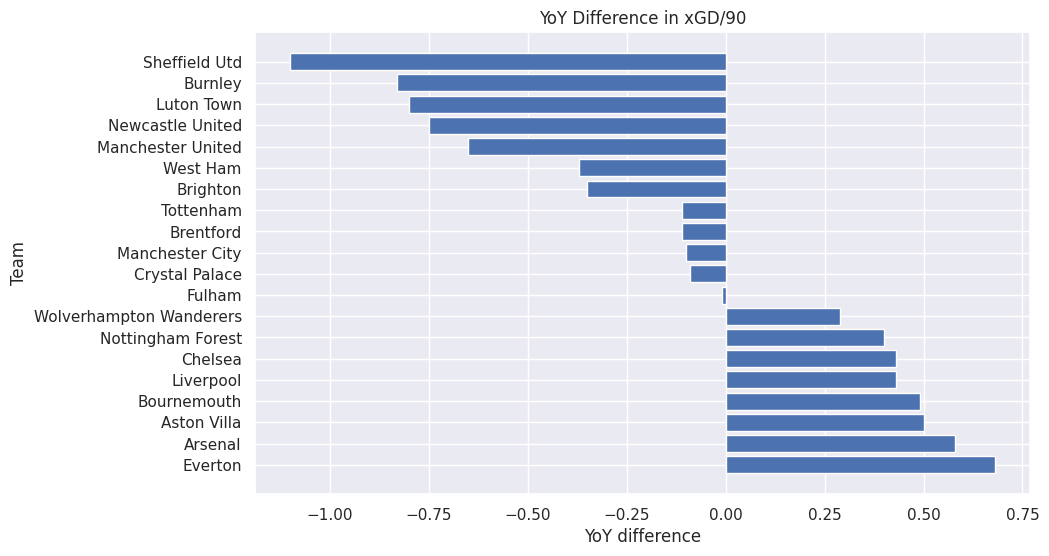

In [90]:
import matplotlib.pyplot as plt

# Create the YoY difference column
merged_df_filtered['YoY difference'] = merged_df_filtered['xGD/90_current'] - merged_df_filtered['xGD/90_last']

# Sort the DataFrame by YoY difference in descending order
merged_df_filtered_sorted = merged_df_filtered.sort_values('YoY difference', ascending=False)

# Generate the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(merged_df_filtered_sorted['Team'], merged_df_filtered_sorted['YoY difference'])
plt.xlabel('YoY difference')
plt.ylabel('Team')
plt.title('YoY Difference in xGD/90')
plt.show()

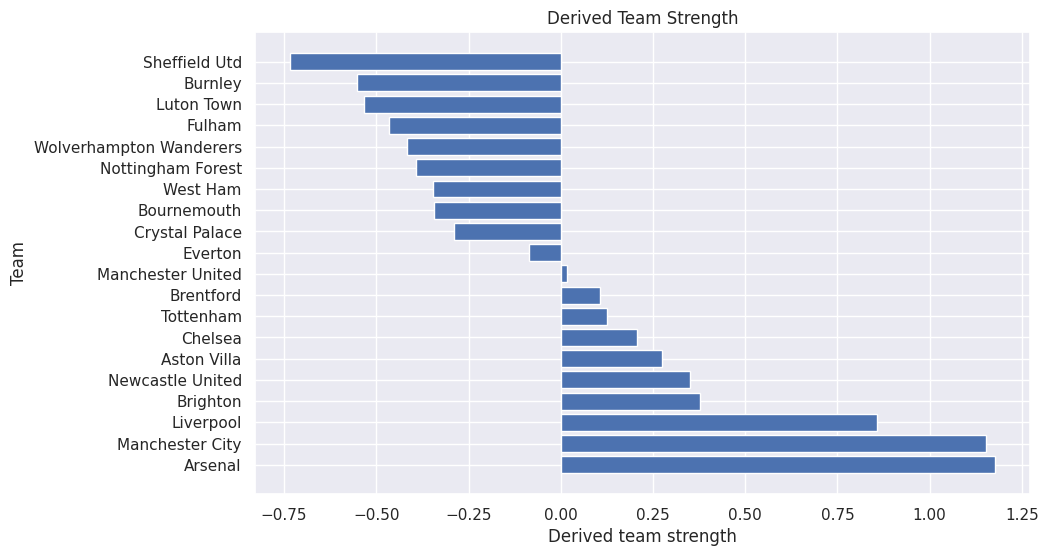

In [91]:
import matplotlib.pyplot as plt

# Create the Derived team strength column
merged_df_filtered['Derived team strength'] = (2/3) * merged_df_filtered['xGD/90_current'] + (1/3) * merged_df_filtered['xGD/90_last']

# Sort the DataFrame by Derived team strength in descending order
merged_df_filtered_sorted = merged_df_filtered.sort_values('Derived team strength', ascending=False)

# Generate the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(merged_df_filtered_sorted['Team'], merged_df_filtered_sorted['Derived team strength'])
plt.xlabel('Derived team strength')
plt.ylabel('Team')
plt.title('Derived Team Strength')
plt.show()

In [92]:
merged_df_filtered

,Team,xGD/90_current,xGD/90_last,YoY difference,Derived team strength
0,Liverpool,1.00,0.57,0.43,0.856667
1,Manchester City,1.12,1.22,-0.10,1.153333
2,Arsenal,1.37,0.79,0.58,1.176667
3,Aston Villa,0.44,-0.06,0.50,0.273333
4,Tottenham,0.09,0.20,-0.11,0.126667
5,Manchester United,-0.20,0.45,-0.65,0.016667
6,West Ham,-0.47,-0.10,-0.37,-0.346667
7,Newcastle United,0.10,0.85,-0.75,0.350000
8,Brighton,0.26,0.61,-0.35,0.376667
9,Wolverhampton Wanderers,-0.32,-0.61,0.29,-0.416667


In [93]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mar 1 17:50:36 2020
@author: doug hagey
"""

import pandas as pd
import requests

def scrape_understat(payload):
    #Build request using url, headers (mimicking what Firefox does normally)
    #Works best with verify=True as you won't get the ssl errors. Payload is
    #taylored for each request
    url = 'https://understat.com/main/getPlayersStats/'
    headers = {'content-type':'application/json; charset=utf-8',
    'Host': 'understat.com',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:73.0) Gecko/20100101 Firefox/73.0',
    'Accept': 'application/json, text/javascript, */*; q=0.01',
    'Accept-Encoding': 'gzip, deflate, br',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'X-Requested-With': 'XMLHttpRequest',
    'Content-Length': '310',
    'Origin': 'https: // understat.com',
    'Connection': 'keep - alive',
    'Referer': 'https: // understat.com / league / EPL'
    }
    response = requests.post(url, data=payload, headers = headers, verify=True)
    response_json = response.json()
    inner_wrapper = response_json['response']
    json_player_data = inner_wrapper['players']
    return json_player_data

def clean_df(player_df, weeks):
    # Get rid of the columns that we don't care about
    player_df.drop(['yellow_cards','red_cards', 'xGChain','xGBuildup','games','time'], axis=1, inplace=True)
    player_df  = player_df.rename(columns={'goals':'goals_'+weeks,'xG':'xG_'+weeks,'assists':'assists_'+weeks, 'xA':'xA_'+weeks, 'shots':'shots_'+weeks, 'key_passes':
        'key_passes_'+weeks,'npg':'npg_'+weeks,'npxG':'npxG_'+weeks})
    return(player_df)

#Creprint('Getting data for last 5 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '5'})
five_game_table = pd.DataFrame(json_player_data)
five_game_df = clean_df(five_game_table,'5wks')


print('Getting data for the whole season')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023'})
season_table = pd.DataFrame(json_player_data)
season_df = clean_df(season_table, 'season')

print('Getting data for last 5 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '5'})
five_game_table = pd.DataFrame(json_player_data)
five_game_df = clean_df(five_game_table,'5wks')

print('Getting data for the whole season')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023'})
season_table = pd.DataFrame(json_player_data)
season_df = clean_df(season_table, 'season')

print('Getting data for last 5 matches')
json_player_data = scrape_understat({'league':'EPL', 'season':'2023', 'n_last_matches': '5'})
five_game_table = pd.DataFrame(json_player_data)
five_game_df = clean_df(five_game_table,'5wks')

print('Merging Tables')
EPL_player_df = pd.merge(five_game_df, season_df, on=['id','player_name'])
EPL_player_df = pd.merge(EPL_player_df, five_game_df, on=['id','player_name'])


print('Writing CSV File')
EPL_player_df.to_csv('Understat_EPL_Player_Data_Combined 2021.csv', encoding='utf-8', index=False)


# Assuming you have a DataFrame named EPL_player_df

# Extract relevant columns
selected_columns = ['player_name', 'xG_5wks_x', 'xA_5wks_x']
subset_df = EPL_player_df[selected_columns]

# Rename columns
subset_df.rename(columns={'xG_5wks_x': 'xG 5 Weeks', 'xA_5wks_x': 'xA 5 Weeks'}, inplace=True)

# Round the numbers to 2 decimal places
subset_df = subset_df.round(2)

# Sort by xG 5 Weeks in descending order
top_10_xG = subset_df.sort_values(by='xG 5 Weeks', ascending=False).head(10)

# Sort by xA 5 Weeks in descending order
top_10_xA = subset_df.sort_values(by='xA 5 Weeks', ascending=False).head(10)

# Display the top 10 for xG 5 Weeks
print("Top 10 for xG 5 Weeks:")
print(top_10_xG)

# Display the top 10 for xA 5 Weeks
print("\nTop 10 for xA 5 Weeks:")
print(top_10_xA)



Getting data for the whole season
Getting data for last 5 matches
Getting data for the whole season
Getting data for last 5 matches
Merging Tables
Writing CSV File
Top 10 for xG 5 Weeks:
       player_name          xG 5 Weeks           xA 5 Weeks
1    Ollie Watkins   4.938535392284393   1.0338348634541035
10  Erling Haaland   4.859081387519836  0.17315050214529037
0      Bukayo Saka    4.18532720208168   1.2319470643997192
2   Rasmus Højlund   4.114747099578381   0.3521185889840126
6    Mohamed Salah   3.925468772649765    2.983798623085022
5   Elijah Adebayo   3.737639993429184  0.15402574092149734
9    Matheus Cunha  3.6102453991770744    1.024787351489067
43       Luis Díaz  3.5692889243364334   0.8946414384990931
21      João Pedro  3.2716708071529865   0.7514005489647388
22    Darwin Núñez  3.0793482549488544   0.8714248612523079

Top 10 for xA 5 Weeks:
            player_name           xG 5 Weeks          xA 5 Weeks
6         Mohamed Salah    3.925468772649765   2.983798623085022

In [94]:
# Extract relevant columns
selected_columns_xG = ['team_name', 'xG_5wks']
selected_columns_xGA = ['team_name', 'xGA_5wks']

# Rename columns
subset_xG = season_df[selected_columns_xG].rename(columns={'xG_5wks': 'xG 5 Weeks'})
subset_xGA = season_df[selected_columns_xGA].rename(columns={'xGA_5wks': 'xGA 5 Weeks'})

# Sort by xG 5 Weeks and xGA 5 Weeks respectively
top_xG = subset_xG.sort_values(by='xG 5 Weeks', ascending=False).head(10)
top_xGA = subset_xGA.sort_values(by='xGA 5 Weeks', ascending=False).head(10)

# Display the top 10 for xG 5 Weeks
print("Top 10 teams with the highest xG over the last 5 games:")
print(top_xG)

# Display the top 10 for xGA 5 Weeks
print("\nTop 10 teams with the highest xGA over the last 5 games:")
print(top_xGA)


KeyError: "None of [Index(['team_name', 'xG_5wks'], dtype='object')] are in the [columns]"

In [ ]:
import pandas as pd

# Your list of values
values = [0.91, 0.326666667, 1.073333333, 0.93, 0.08, -0.286666667, 0.383333333, 0.036666667, 0.476666667, 0.326666667, -0.416666667, -0.376666667, -0.486666667, -0.21, -0.453333333, 0.32, -0.1, -0.68, -0.566666667, -0.786666667]

# Update the existing dataframe
merged_df_filtered['Derived team strength'] = values

# Set the desired range
new_min = 0.5
new_max = 1.5

# Scale the values
min_value = merged_df_filtered['Derived team strength'].min()
max_value = merged_df_filtered['Derived team strength'].max()

merged_df_filtered['Derived team strength'] = ((merged_df_filtered['Derived team strength'] - min_value) * (new_max - new_min) / (max_value - min_value)) + new_min

# Display the updated dataframe
merged_df_filtered
